In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
from sklearn import datasets as toy_data
from torch.utils.data import Dataset, DataLoader


In [2]:
x1,y1 = toy_data.make_circles(n_samples=30,factor=0.5)

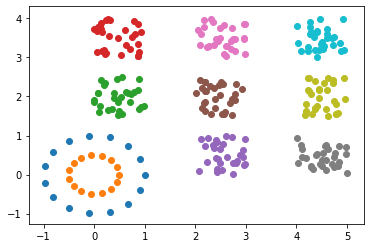

In [3]:
# x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
# x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )




x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))
plt.scatter(x1[y1==0,0],x1[y1==0,1])
plt.scatter(x1[y1==1,0],x1[y1==1,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])



In [4]:
# y11  = np.zeros(15)
# y12 = np.ones(15)

Y2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    y2 = np.ones(30)
    y2[idx] = 0 
    Y2_.append(y2)

Y2_ = np.concatenate(Y2_,axis=0)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
X_train = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9))

Y_train = np.concatenate((y1,Y2_))



In [6]:
X_train.shape,Y_train.shape

((270, 2), (270,))

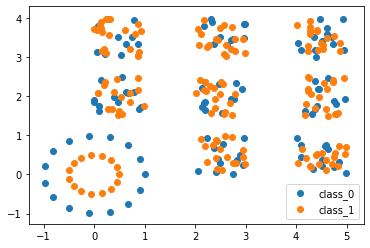

In [7]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],label = "class_0")
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],label = "class_1")
plt.legend()


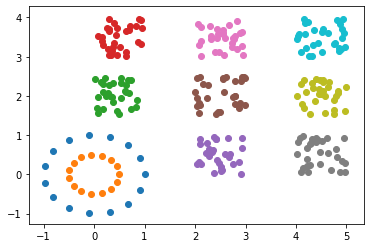

In [8]:
# x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
# x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )
xt1,yt1 = toy_data.make_circles(n_samples=30,factor=0.5)

x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))
plt.scatter(xt1[yt1==0,0],xt1[yt1==0,1])
plt.scatter(xt1[yt1==1,0],xt1[yt1==1,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])

# yt11  = np.zeros(15)
# yt12 = np.ones(15)

Yt2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    yt2 = np.ones(30)
    yt2[idx] = 0 
    Yt2_.append(yt2)

Yt2_ = np.concatenate(Yt2_,axis=0)
Y_test = np.concatenate((yt1,Yt2_))
X_test = np.concatenate((xt1,x2,x3,x4,x5,x6,x7,x8,x9))

In [9]:
X_test.shape,Y_test.shape

((270, 2), (270,))

In [10]:
class Grid_data(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    
    def __len__(self):
        
        return len(self.x)
    
    
    def __getitem__(self,idx):
        self.dx = self.x[idx,:]
        self.dy = self.y[idx]
        
        self.dx = self.dx
        self.dy = self.dy
        return self.dx, self.dy
        

In [11]:
trainset = Grid_data(X_train,Y_train)


In [12]:
trainloader = DataLoader(trainset,batch_size=10,shuffle = False)

In [13]:
inputs,label = iter(trainloader).next()

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear1 = nn.Linear(2,100)
        self.linear2 = nn.Linear(100,100)
        self.linear3 = nn.Linear(100,200)
        self.linear4 = nn.Linear(200,200)
        self.linear5 = nn.Linear(200,400)
        self.linear6 = nn.Linear(400,600)
#         self.linear7 = nn.Linear(200,200)
#         self.linear8 = nn.Linear(200,100)
        self.linear9 = nn.Linear(600,2)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        x = F.relu(self.linear6(x))
#         x = F.relu(self.linear7(x))
#         x = F.relu(self.linear8(x))
        x = self.linear9(x)
        
        
        return x

In [15]:
net = Net()
# net(inputs)


In [16]:
net = net.to("cuda")

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)#, momentum=0.9)

In [18]:
loss_curi = []
epochs_nos = 2000
for epoch in range(epochs_nos): # loop over the dataset multiple times
    ep_lossi = []
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/2 ))
            ep_lossi.append(running_loss/2) # loss per minibatch
            running_loss = 0.0
            
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,     2] loss: 0.684
[1,     4] loss: 0.723
[1,     6] loss: 0.689
[1,     8] loss: 0.690
[1,    10] loss: 0.652
[1,    12] loss: 0.689
[1,    14] loss: 0.677
[1,    16] loss: 0.674
[1,    18] loss: 0.653
[1,    20] loss: 0.722
[1,    22] loss: 0.633
[1,    24] loss: 0.675
[1,    26] loss: 0.649
[2,     2] loss: 0.658
[2,     4] loss: 0.744
[2,     6] loss: 0.691
[2,     8] loss: 0.688
[2,    10] loss: 0.622
[2,    12] loss: 0.689
[2,    14] loss: 0.675
[2,    16] loss: 0.675
[2,    18] loss: 0.660
[2,    20] loss: 0.704
[2,    22] loss: 0.645
[2,    24] loss: 0.674
[2,    26] loss: 0.655
[3,     2] loss: 0.656
[3,     4] loss: 0.745
[3,     6] loss: 0.692
[3,     8] loss: 0.691
[3,    10] loss: 0.607
[3,    12] loss: 0.690
[3,    14] loss: 0.674
[3,    16] loss: 0.673
[3,    18] loss: 0.654
[3,    20] loss: 0.710
[3,    22] loss: 0.639
[3,    24] loss: 0.673
[3,    26] loss: 0.651
[4,     2] loss: 0.655
[4,     4] loss: 0.740
[4,     6] loss: 0.693
[4,     8] loss: 0.691
[4,    10] 

[30,    10] loss: 0.602
[30,    12] loss: 0.687
[30,    14] loss: 0.675
[30,    16] loss: 0.675
[30,    18] loss: 0.658
[30,    20] loss: 0.712
[30,    22] loss: 0.637
[30,    24] loss: 0.674
[30,    26] loss: 0.650
[31,     2] loss: 0.208
[31,     4] loss: 0.377
[31,     6] loss: 0.688
[31,     8] loss: 0.689
[31,    10] loss: 0.627
[31,    12] loss: 0.687
[31,    14] loss: 0.675
[31,    16] loss: 0.675
[31,    18] loss: 0.655
[31,    20] loss: 0.718
[31,    22] loss: 0.631
[31,    24] loss: 0.674
[31,    26] loss: 0.649
[32,     2] loss: 0.192
[32,     4] loss: 0.376
[32,     6] loss: 0.687
[32,     8] loss: 0.688
[32,    10] loss: 0.631
[32,    12] loss: 0.687
[32,    14] loss: 0.676
[32,    16] loss: 0.675
[32,    18] loss: 0.659
[32,    20] loss: 0.710
[32,    22] loss: 0.638
[32,    24] loss: 0.674
[32,    26] loss: 0.651
[33,     2] loss: 0.141
[33,     4] loss: 0.346
[33,     6] loss: 0.654
[33,     8] loss: 0.690
[33,    10] loss: 0.620
[33,    12] loss: 0.688
[33,    14] loss

[59,    12] loss: 0.690
[59,    14] loss: 0.674
[59,    16] loss: 0.673
[59,    18] loss: 0.654
[59,    20] loss: 0.715
[59,    22] loss: 0.632
[59,    24] loss: 0.673
[59,    26] loss: 0.650
[60,     2] loss: 0.660
[60,     4] loss: 0.732
[60,     6] loss: 0.691
[60,     8] loss: 0.691
[60,    10] loss: 0.604
[60,    12] loss: 0.690
[60,    14] loss: 0.674
[60,    16] loss: 0.673
[60,    18] loss: 0.654
[60,    20] loss: 0.715
[60,    22] loss: 0.632
[60,    24] loss: 0.673
[60,    26] loss: 0.651
[61,     2] loss: 0.660
[61,     4] loss: 0.732
[61,     6] loss: 0.691
[61,     8] loss: 0.691
[61,    10] loss: 0.604
[61,    12] loss: 0.690
[61,    14] loss: 0.674
[61,    16] loss: 0.673
[61,    18] loss: 0.654
[61,    20] loss: 0.715
[61,    22] loss: 0.632
[61,    24] loss: 0.673
[61,    26] loss: 0.651
[62,     2] loss: 0.660
[62,     4] loss: 0.732
[62,     6] loss: 0.691
[62,     8] loss: 0.691
[62,    10] loss: 0.604
[62,    12] loss: 0.690
[62,    14] loss: 0.674
[62,    16] loss

[88,    10] loss: 0.592
[88,    12] loss: 0.690
[88,    14] loss: 0.674
[88,    16] loss: 0.672
[88,    18] loss: 0.654
[88,    20] loss: 0.716
[88,    22] loss: 0.631
[88,    24] loss: 0.673
[88,    26] loss: 0.650
[89,     2] loss: 0.644
[89,     4] loss: 0.722
[89,     6] loss: 0.693
[89,     8] loss: 0.696
[89,    10] loss: 0.587
[89,    12] loss: 0.690
[89,    14] loss: 0.674
[89,    16] loss: 0.672
[89,    18] loss: 0.654
[89,    20] loss: 0.715
[89,    22] loss: 0.632
[89,    24] loss: 0.673
[89,    26] loss: 0.650
[90,     2] loss: 0.640
[90,     4] loss: 0.720
[90,     6] loss: 0.693
[90,     8] loss: 0.697
[90,    10] loss: 0.587
[90,    12] loss: 0.689
[90,    14] loss: 0.674
[90,    16] loss: 0.672
[90,    18] loss: 0.655
[90,    20] loss: 0.716
[90,    22] loss: 0.631
[90,    24] loss: 0.673
[90,    26] loss: 0.649
[91,     2] loss: 0.631
[91,     4] loss: 0.718
[91,     6] loss: 0.693
[91,     8] loss: 0.696
[91,    10] loss: 0.588
[91,    12] loss: 0.689
[91,    14] loss

[115,     6] loss: 0.683
[115,     8] loss: 0.702
[115,    10] loss: 0.609
[115,    12] loss: 0.684
[115,    14] loss: 0.678
[115,    16] loss: 0.673
[115,    18] loss: 0.659
[115,    20] loss: 0.717
[115,    22] loss: 0.634
[115,    24] loss: 0.674
[115,    26] loss: 0.650
[116,     2] loss: 0.142
[116,     4] loss: 0.359
[116,     6] loss: 0.707
[116,     8] loss: 0.708
[116,    10] loss: 0.584
[116,    12] loss: 0.685
[116,    14] loss: 0.677
[116,    16] loss: 0.668
[116,    18] loss: 0.665
[116,    20] loss: 0.710
[116,    22] loss: 0.638
[116,    24] loss: 0.673
[116,    26] loss: 0.650
[117,     2] loss: 0.161
[117,     4] loss: 0.361
[117,     6] loss: 0.683
[117,     8] loss: 0.724
[117,    10] loss: 0.611
[117,    12] loss: 0.678
[117,    14] loss: 0.680
[117,    16] loss: 0.676
[117,    18] loss: 0.666
[117,    20] loss: 0.701
[117,    22] loss: 0.648
[117,    24] loss: 0.674
[117,    26] loss: 0.653
[118,     2] loss: 0.109
[118,     4] loss: 0.348
[118,     6] loss: 0.697


[141,    12] loss: 0.684
[141,    14] loss: 0.675
[141,    16] loss: 0.670
[141,    18] loss: 0.659
[141,    20] loss: 0.710
[141,    22] loss: 0.637
[141,    24] loss: 0.672
[141,    26] loss: 0.650
[142,     2] loss: 0.111
[142,     4] loss: 0.366
[142,     6] loss: 0.694
[142,     8] loss: 0.719
[142,    10] loss: 0.594
[142,    12] loss: 0.685
[142,    14] loss: 0.679
[142,    16] loss: 0.670
[142,    18] loss: 0.660
[142,    20] loss: 0.708
[142,    22] loss: 0.641
[142,    24] loss: 0.672
[142,    26] loss: 0.651
[143,     2] loss: 0.110
[143,     4] loss: 0.361
[143,     6] loss: 0.696
[143,     8] loss: 0.719
[143,    10] loss: 0.574
[143,    12] loss: 0.682
[143,    14] loss: 0.676
[143,    16] loss: 0.671
[143,    18] loss: 0.659
[143,    20] loss: 0.706
[143,    22] loss: 0.642
[143,    24] loss: 0.673
[143,    26] loss: 0.651
[144,     2] loss: 0.086
[144,     4] loss: 0.360
[144,     6] loss: 0.700
[144,     8] loss: 0.702
[144,    10] loss: 0.588
[144,    12] loss: 0.680


[167,    10] loss: 0.588
[167,    12] loss: 0.629
[167,    14] loss: 0.673
[167,    16] loss: 0.669
[167,    18] loss: 0.657
[167,    20] loss: 0.710
[167,    22] loss: 0.637
[167,    24] loss: 0.673
[167,    26] loss: 0.651
[168,     2] loss: 0.000
[168,     4] loss: 0.254
[168,     6] loss: 0.620
[168,     8] loss: 0.724
[168,    10] loss: 0.557
[168,    12] loss: 0.646
[168,    14] loss: 0.673
[168,    16] loss: 0.670
[168,    18] loss: 0.656
[168,    20] loss: 0.710
[168,    22] loss: 0.637
[168,    24] loss: 0.673
[168,    26] loss: 0.652
[169,     2] loss: 0.000
[169,     4] loss: 0.258
[169,     6] loss: 0.620
[169,     8] loss: 0.721
[169,    10] loss: 0.758
[169,    12] loss: 0.607
[169,    14] loss: 0.673
[169,    16] loss: 0.671
[169,    18] loss: 0.655
[169,    20] loss: 0.714
[169,    22] loss: 0.633
[169,    24] loss: 0.673
[169,    26] loss: 0.650
[170,     2] loss: 0.049
[170,     4] loss: 0.367
[170,     6] loss: 0.692
[170,     8] loss: 0.701
[170,    10] loss: 0.579


[194,    20] loss: 0.710
[194,    22] loss: 0.638
[194,    24] loss: 0.674
[194,    26] loss: 0.653
[195,     2] loss: 0.000
[195,     4] loss: 0.289
[195,     6] loss: 0.685
[195,     8] loss: 0.717
[195,    10] loss: 0.555
[195,    12] loss: 0.687
[195,    14] loss: 0.673
[195,    16] loss: 0.669
[195,    18] loss: 0.657
[195,    20] loss: 0.715
[195,    22] loss: 0.634
[195,    24] loss: 0.674
[195,    26] loss: 0.652
[196,     2] loss: 0.000
[196,     4] loss: 0.331
[196,     6] loss: 0.698
[196,     8] loss: 0.728
[196,    10] loss: 0.556
[196,    12] loss: 0.688
[196,    14] loss: 0.673
[196,    16] loss: 0.671
[196,    18] loss: 0.659
[196,    20] loss: 0.703
[196,    22] loss: 0.647
[196,    24] loss: 0.676
[196,    26] loss: 0.658
[197,     2] loss: 0.000
[197,     4] loss: 0.319
[197,     6] loss: 0.644
[197,     8] loss: 0.705
[197,    10] loss: 0.572
[197,    12] loss: 0.685
[197,    14] loss: 0.672
[197,    16] loss: 0.670
[197,    18] loss: 0.653
[197,    20] loss: 0.715


[222,     4] loss: 0.333
[222,     6] loss: 0.696
[222,     8] loss: 0.713
[222,    10] loss: 0.574
[222,    12] loss: 0.642
[222,    14] loss: 0.672
[222,    16] loss: 0.668
[222,    18] loss: 0.654
[222,    20] loss: 0.710
[222,    22] loss: 0.638
[222,    24] loss: 0.675
[222,    26] loss: 0.657
[223,     2] loss: 0.000
[223,     4] loss: 0.333
[223,     6] loss: 0.697
[223,     8] loss: 0.711
[223,    10] loss: 0.575
[223,    12] loss: 0.641
[223,    14] loss: 0.671
[223,    16] loss: 0.668
[223,    18] loss: 0.654
[223,    20] loss: 0.710
[223,    22] loss: 0.638
[223,    24] loss: 0.675
[223,    26] loss: 0.656
[224,     2] loss: 0.000
[224,     4] loss: 0.333
[224,     6] loss: 0.697
[224,     8] loss: 0.712
[224,    10] loss: 0.605
[224,    12] loss: 0.650
[224,    14] loss: 0.671
[224,    16] loss: 0.669
[224,    18] loss: 0.654
[224,    20] loss: 0.711
[224,    22] loss: 0.636
[224,    24] loss: 0.675
[224,    26] loss: 0.654
[225,     2] loss: 0.000
[225,     4] loss: 0.336


[248,     2] loss: 15.038
[248,     4] loss: 4.317
[248,     6] loss: 0.692
[248,     8] loss: 0.692
[248,    10] loss: 0.690
[248,    12] loss: 0.697
[248,    14] loss: 0.694
[248,    16] loss: 0.697
[248,    18] loss: 0.687
[248,    20] loss: 0.693
[248,    22] loss: 0.654
[248,    24] loss: 0.676
[248,    26] loss: 0.652
[249,     2] loss: 47.007
[249,     4] loss: 3.464
[249,     6] loss: 0.689
[249,     8] loss: 0.693
[249,    10] loss: 0.598
[249,    12] loss: 0.696
[249,    14] loss: 0.680
[249,    16] loss: 0.685
[249,    18] loss: 0.655
[249,    20] loss: 0.746
[249,    22] loss: 0.624
[249,    24] loss: 0.673
[249,    26] loss: 0.651
[250,     2] loss: 0.851
[250,     4] loss: 1.360
[250,     6] loss: 0.689
[250,     8] loss: 0.689
[250,    10] loss: 0.621
[250,    12] loss: 0.689
[250,    14] loss: 0.675
[250,    16] loss: 0.674
[250,    18] loss: 0.655
[250,    20] loss: 0.715
[250,    22] loss: 0.632
[250,    24] loss: 0.674
[250,    26] loss: 0.650
[251,     2] loss: 0.66

[274,    12] loss: 0.692
[274,    14] loss: 0.673
[274,    16] loss: 0.674
[274,    18] loss: 0.653
[274,    20] loss: 0.719
[274,    22] loss: 0.629
[274,    24] loss: 0.673
[274,    26] loss: 0.650
[275,     2] loss: 0.555
[275,     4] loss: 0.432
[275,     6] loss: 0.692
[275,     8] loss: 0.693
[275,    10] loss: 0.594
[275,    12] loss: 0.692
[275,    14] loss: 0.673
[275,    16] loss: 0.674
[275,    18] loss: 0.652
[275,    20] loss: 0.719
[275,    22] loss: 0.629
[275,    24] loss: 0.673
[275,    26] loss: 0.650
[276,     2] loss: 0.546
[276,     4] loss: 0.430
[276,     6] loss: 0.693
[276,     8] loss: 0.693
[276,    10] loss: 0.592
[276,    12] loss: 0.693
[276,    14] loss: 0.674
[276,    16] loss: 0.674
[276,    18] loss: 0.652
[276,    20] loss: 0.723
[276,    22] loss: 0.628
[276,    24] loss: 0.674
[276,    26] loss: 0.650
[277,     2] loss: 0.536
[277,     4] loss: 0.428
[277,     6] loss: 0.692
[277,     8] loss: 0.692
[277,    10] loss: 0.597
[277,    12] loss: 0.692


[300,    16] loss: 0.672
[300,    18] loss: 0.656
[300,    20] loss: 0.715
[300,    22] loss: 0.634
[300,    24] loss: 0.674
[300,    26] loss: 0.650
[301,     2] loss: 0.279
[301,     4] loss: 0.460
[301,     6] loss: 0.696
[301,     8] loss: 0.687
[301,    10] loss: 0.604
[301,    12] loss: 0.688
[301,    14] loss: 0.676
[301,    16] loss: 0.673
[301,    18] loss: 0.658
[301,    20] loss: 0.709
[301,    22] loss: 0.638
[301,    24] loss: 0.675
[301,    26] loss: 0.649
[302,     2] loss: 0.277
[302,     4] loss: 0.459
[302,     6] loss: 0.697
[302,     8] loss: 0.689
[302,    10] loss: 0.600
[302,    12] loss: 0.688
[302,    14] loss: 0.677
[302,    16] loss: 0.674
[302,    18] loss: 0.660
[302,    20] loss: 0.706
[302,    22] loss: 0.641
[302,    24] loss: 0.675
[302,    26] loss: 0.649
[303,     2] loss: 0.272
[303,     4] loss: 0.459
[303,     6] loss: 0.697
[303,     8] loss: 0.696
[303,    10] loss: 0.588
[303,    12] loss: 0.688
[303,    14] loss: 0.675
[303,    16] loss: 0.673


[326,    12] loss: 0.685
[326,    14] loss: 0.674
[326,    16] loss: 0.673
[326,    18] loss: 0.656
[326,    20] loss: 0.714
[326,    22] loss: 0.632
[326,    24] loss: 0.673
[326,    26] loss: 0.650
[327,     2] loss: 0.169
[327,     4] loss: 0.364
[327,     6] loss: 0.689
[327,     8] loss: 0.692
[327,    10] loss: 0.601
[327,    12] loss: 0.685
[327,    14] loss: 0.674
[327,    16] loss: 0.672
[327,    18] loss: 0.657
[327,    20] loss: 0.715
[327,    22] loss: 0.632
[327,    24] loss: 0.673
[327,    26] loss: 0.650
[328,     2] loss: 0.168
[328,     4] loss: 0.364
[328,     6] loss: 0.688
[328,     8] loss: 0.691
[328,    10] loss: 0.603
[328,    12] loss: 0.684
[328,    14] loss: 0.674
[328,    16] loss: 0.672
[328,    18] loss: 0.657
[328,    20] loss: 0.709
[328,    22] loss: 0.648
[328,    24] loss: 0.674
[328,    26] loss: 0.651
[329,     2] loss: 0.155
[329,     4] loss: 0.361
[329,     6] loss: 0.687
[329,     8] loss: 0.693
[329,    10] loss: 0.599
[329,    12] loss: 0.682


[352,    24] loss: 0.673
[352,    26] loss: 0.654
[353,     2] loss: 0.005
[353,     4] loss: 0.329
[353,     6] loss: 0.672
[353,     8] loss: 0.704
[353,    10] loss: 0.618
[353,    12] loss: 0.647
[353,    14] loss: 0.674
[353,    16] loss: 0.670
[353,    18] loss: 0.658
[353,    20] loss: 0.708
[353,    22] loss: 0.638
[353,    24] loss: 0.673
[353,    26] loss: 0.652
[354,     2] loss: 0.002
[354,     4] loss: 0.272
[354,     6] loss: 0.635
[354,     8] loss: 0.707
[354,    10] loss: 0.576
[354,    12] loss: 0.661
[354,    14] loss: 0.673
[354,    16] loss: 0.669
[354,    18] loss: 0.658
[354,    20] loss: 0.710
[354,    22] loss: 0.637
[354,    24] loss: 0.673
[354,    26] loss: 0.652
[355,     2] loss: 0.001
[355,     4] loss: 0.253
[355,     6] loss: 0.625
[355,     8] loss: 0.714
[355,    10] loss: 0.567
[355,    12] loss: 0.658
[355,    14] loss: 0.673
[355,    16] loss: 0.669
[355,    18] loss: 0.662
[355,    20] loss: 0.711
[355,    22] loss: 0.635
[355,    24] loss: 0.673


[379,     8] loss: 0.705
[379,    10] loss: 0.591
[379,    12] loss: 0.669
[379,    14] loss: 0.673
[379,    16] loss: 0.669
[379,    18] loss: 0.658
[379,    20] loss: 0.705
[379,    22] loss: 0.644
[379,    24] loss: 0.672
[379,    26] loss: 0.652
[380,     2] loss: 0.034
[380,     4] loss: 0.345
[380,     6] loss: 0.693
[380,     8] loss: 0.704
[380,    10] loss: 0.607
[380,    12] loss: 0.660
[380,    14] loss: 0.674
[380,    16] loss: 0.670
[380,    18] loss: 0.658
[380,    20] loss: 0.707
[380,    22] loss: 0.640
[380,    24] loss: 0.672
[380,    26] loss: 0.649
[381,     2] loss: 0.042
[381,     4] loss: 0.350
[381,     6] loss: 0.694
[381,     8] loss: 0.706
[381,    10] loss: 0.577
[381,    12] loss: 0.667
[381,    14] loss: 0.673
[381,    16] loss: 0.670
[381,    18] loss: 0.658
[381,    20] loss: 0.703
[381,    22] loss: 0.646
[381,    24] loss: 0.673
[381,    26] loss: 0.654
[382,     2] loss: 0.016
[382,     4] loss: 0.338
[382,     6] loss: 0.690
[382,     8] loss: 0.702


[405,    10] loss: 0.583
[405,    12] loss: 0.686
[405,    14] loss: 0.673
[405,    16] loss: 0.672
[405,    18] loss: 0.656
[405,    20] loss: 0.711
[405,    22] loss: 0.635
[405,    24] loss: 0.672
[405,    26] loss: 0.650
[406,     2] loss: 0.002
[406,     4] loss: 0.335
[406,     6] loss: 0.691
[406,     8] loss: 0.697
[406,    10] loss: 0.585
[406,    12] loss: 0.678
[406,    14] loss: 0.673
[406,    16] loss: 0.671
[406,    18] loss: 0.656
[406,    20] loss: 0.710
[406,    22] loss: 0.637
[406,    24] loss: 0.672
[406,    26] loss: 0.651
[407,     2] loss: 0.001
[407,     4] loss: 0.334
[407,     6] loss: 0.688
[407,     8] loss: 0.698
[407,    10] loss: 0.585
[407,    12] loss: 0.646
[407,    14] loss: 0.673
[407,    16] loss: 0.671
[407,    18] loss: 0.656
[407,    20] loss: 0.708
[407,    22] loss: 0.638
[407,    24] loss: 0.672
[407,    26] loss: 0.651
[408,     2] loss: 0.001
[408,     4] loss: 0.328
[408,     6] loss: 0.671
[408,     8] loss: 0.698
[408,    10] loss: 0.721


[431,    24] loss: 0.672
[431,    26] loss: 0.650
[432,     2] loss: 0.085
[432,     4] loss: 0.377
[432,     6] loss: 0.692
[432,     8] loss: 0.696
[432,    10] loss: 0.588
[432,    12] loss: 0.688
[432,    14] loss: 0.673
[432,    16] loss: 0.672
[432,    18] loss: 0.654
[432,    20] loss: 0.711
[432,    22] loss: 0.636
[432,    24] loss: 0.672
[432,    26] loss: 0.650
[433,     2] loss: 0.085
[433,     4] loss: 0.376
[433,     6] loss: 0.693
[433,     8] loss: 0.699
[433,    10] loss: 0.582
[433,    12] loss: 0.688
[433,    14] loss: 0.673
[433,    16] loss: 0.672
[433,    18] loss: 0.654
[433,    20] loss: 0.710
[433,    22] loss: 0.637
[433,    24] loss: 0.672
[433,    26] loss: 0.650
[434,     2] loss: 0.084
[434,     4] loss: 0.375
[434,     6] loss: 0.694
[434,     8] loss: 0.701
[434,    10] loss: 0.578
[434,    12] loss: 0.688
[434,    14] loss: 0.673
[434,    16] loss: 0.671
[434,    18] loss: 0.655
[434,    20] loss: 0.709
[434,    22] loss: 0.638
[434,    24] loss: 0.672


[457,    24] loss: 0.672
[457,    26] loss: 0.651
[458,     2] loss: 0.083
[458,     4] loss: 0.373
[458,     6] loss: 0.694
[458,     8] loss: 0.704
[458,    10] loss: 0.572
[458,    12] loss: 0.688
[458,    14] loss: 0.673
[458,    16] loss: 0.671
[458,    18] loss: 0.656
[458,    20] loss: 0.709
[458,    22] loss: 0.638
[458,    24] loss: 0.672
[458,    26] loss: 0.651
[459,     2] loss: 0.083
[459,     4] loss: 0.373
[459,     6] loss: 0.694
[459,     8] loss: 0.704
[459,    10] loss: 0.572
[459,    12] loss: 0.688
[459,    14] loss: 0.673
[459,    16] loss: 0.670
[459,    18] loss: 0.656
[459,    20] loss: 0.709
[459,    22] loss: 0.639
[459,    24] loss: 0.672
[459,    26] loss: 0.651
[460,     2] loss: 0.083
[460,     4] loss: 0.373
[460,     6] loss: 0.694
[460,     8] loss: 0.706
[460,    10] loss: 0.570
[460,    12] loss: 0.688
[460,    14] loss: 0.673
[460,    16] loss: 0.669
[460,    18] loss: 0.658
[460,    20] loss: 0.708
[460,    22] loss: 0.639
[460,    24] loss: 0.673


[483,    24] loss: 0.672
[483,    26] loss: 0.652
[484,     2] loss: 0.080
[484,     4] loss: 0.369
[484,     6] loss: 0.694
[484,     8] loss: 0.713
[484,    10] loss: 0.561
[484,    12] loss: 0.687
[484,    14] loss: 0.673
[484,    16] loss: 0.670
[484,    18] loss: 0.657
[484,    20] loss: 0.707
[484,    22] loss: 0.640
[484,    24] loss: 0.673
[484,    26] loss: 0.652
[485,     2] loss: 0.080
[485,     4] loss: 0.370
[485,     6] loss: 0.693
[485,     8] loss: 0.709
[485,    10] loss: 0.565
[485,    12] loss: 0.687
[485,    14] loss: 0.673
[485,    16] loss: 0.670
[485,    18] loss: 0.657
[485,    20] loss: 0.707
[485,    22] loss: 0.641
[485,    24] loss: 0.673
[485,    26] loss: 0.652
[486,     2] loss: 0.080
[486,     4] loss: 0.370
[486,     6] loss: 0.692
[486,     8] loss: 0.708
[486,    10] loss: 0.565
[486,    12] loss: 0.687
[486,    14] loss: 0.673
[486,    16] loss: 0.670
[486,    18] loss: 0.657
[486,    20] loss: 0.708
[486,    22] loss: 0.639
[486,    24] loss: 0.672


[509,    26] loss: 0.652
[510,     2] loss: 0.000
[510,     4] loss: 0.330
[510,     6] loss: 0.692
[510,     8] loss: 0.707
[510,    10] loss: 0.561
[510,    12] loss: 0.686
[510,    14] loss: 0.673
[510,    16] loss: 0.670
[510,    18] loss: 0.657
[510,    20] loss: 0.707
[510,    22] loss: 0.641
[510,    24] loss: 0.672
[510,    26] loss: 0.651
[511,     2] loss: 0.000
[511,     4] loss: 0.330
[511,     6] loss: 0.691
[511,     8] loss: 0.706
[511,    10] loss: 0.560
[511,    12] loss: 0.686
[511,    14] loss: 0.673
[511,    16] loss: 0.670
[511,    18] loss: 0.657
[511,    20] loss: 0.707
[511,    22] loss: 0.641
[511,    24] loss: 0.672
[511,    26] loss: 0.652
[512,     2] loss: 0.000
[512,     4] loss: 0.330
[512,     6] loss: 0.691
[512,     8] loss: 0.707
[512,    10] loss: 0.560
[512,    12] loss: 0.686
[512,    14] loss: 0.673
[512,    16] loss: 0.670
[512,    18] loss: 0.657
[512,    20] loss: 0.706
[512,    22] loss: 0.642
[512,    24] loss: 0.672
[512,    26] loss: 0.652


[536,     2] loss: 0.000
[536,     4] loss: 0.331
[536,     6] loss: 0.691
[536,     8] loss: 0.696
[536,    10] loss: 0.570
[536,    12] loss: 0.686
[536,    14] loss: 0.672
[536,    16] loss: 0.670
[536,    18] loss: 0.656
[536,    20] loss: 0.710
[536,    22] loss: 0.637
[536,    24] loss: 0.672
[536,    26] loss: 0.651
[537,     2] loss: 0.000
[537,     4] loss: 0.331
[537,     6] loss: 0.691
[537,     8] loss: 0.696
[537,    10] loss: 0.568
[537,    12] loss: 0.686
[537,    14] loss: 0.672
[537,    16] loss: 0.670
[537,    18] loss: 0.656
[537,    20] loss: 0.709
[537,    22] loss: 0.638
[537,    24] loss: 0.672
[537,    26] loss: 0.651
[538,     2] loss: 0.000
[538,     4] loss: 0.331
[538,     6] loss: 0.691
[538,     8] loss: 0.696
[538,    10] loss: 0.567
[538,    12] loss: 0.686
[538,    14] loss: 0.672
[538,    16] loss: 0.670
[538,    18] loss: 0.656
[538,    20] loss: 0.709
[538,    22] loss: 0.638
[538,    24] loss: 0.672
[538,    26] loss: 0.651
[539,     2] loss: 0.000


[562,    22] loss: 0.640
[562,    24] loss: 0.671
[562,    26] loss: 0.651
[563,     2] loss: 0.121
[563,     4] loss: 0.372
[563,     6] loss: 0.691
[563,     8] loss: 0.699
[563,    10] loss: 0.587
[563,    12] loss: 0.687
[563,    14] loss: 0.672
[563,    16] loss: 0.671
[563,    18] loss: 0.655
[563,    20] loss: 0.708
[563,    22] loss: 0.640
[563,    24] loss: 0.671
[563,    26] loss: 0.651
[564,     2] loss: 0.120
[564,     4] loss: 0.372
[564,     6] loss: 0.691
[564,     8] loss: 0.699
[564,    10] loss: 0.586
[564,    12] loss: 0.687
[564,    14] loss: 0.672
[564,    16] loss: 0.671
[564,    18] loss: 0.655
[564,    20] loss: 0.708
[564,    22] loss: 0.640
[564,    24] loss: 0.671
[564,    26] loss: 0.651
[565,     2] loss: 0.120
[565,     4] loss: 0.372
[565,     6] loss: 0.691
[565,     8] loss: 0.699
[565,    10] loss: 0.585
[565,    12] loss: 0.687
[565,    14] loss: 0.672
[565,    16] loss: 0.671
[565,    18] loss: 0.656
[565,    20] loss: 0.708
[565,    22] loss: 0.640


[589,    10] loss: 0.561
[589,    12] loss: 0.684
[589,    14] loss: 0.672
[589,    16] loss: 0.668
[589,    18] loss: 0.659
[589,    20] loss: 0.699
[589,    22] loss: 0.652
[589,    24] loss: 0.671
[589,    26] loss: 0.652
[590,     2] loss: 0.000
[590,     4] loss: 0.325
[590,     6] loss: 0.689
[590,     8] loss: 0.715
[590,    10] loss: 0.560
[590,    12] loss: 0.684
[590,    14] loss: 0.672
[590,    16] loss: 0.669
[590,    18] loss: 0.659
[590,    20] loss: 0.700
[590,    22] loss: 0.649
[590,    24] loss: 0.671
[590,    26] loss: 0.651
[591,     2] loss: 0.000
[591,     4] loss: 0.325
[591,     6] loss: 0.689
[591,     8] loss: 0.718
[591,    10] loss: 0.559
[591,    12] loss: 0.684
[591,    14] loss: 0.672
[591,    16] loss: 0.668
[591,    18] loss: 0.658
[591,    20] loss: 0.699
[591,    22] loss: 0.651
[591,    24] loss: 0.672
[591,    26] loss: 0.653
[592,     2] loss: 0.000
[592,     4] loss: 0.325
[592,     6] loss: 0.689
[592,     8] loss: 0.713
[592,    10] loss: 0.560


[616,    14] loss: 0.676
[616,    16] loss: 0.674
[616,    18] loss: 0.662
[616,    20] loss: 0.699
[616,    22] loss: 0.656
[616,    24] loss: 0.674
[616,    26] loss: 0.656
[617,     2] loss: 0.774
[617,     4] loss: 0.496
[617,     6] loss: 0.631
[617,     8] loss: 0.692
[617,    10] loss: 0.665
[617,    12] loss: 0.634
[617,    14] loss: 0.673
[617,    16] loss: 0.671
[617,    18] loss: 0.655
[617,    20] loss: 0.712
[617,    22] loss: 0.636
[617,    24] loss: 0.672
[617,    26] loss: 0.649
[618,     2] loss: 0.621
[618,     4] loss: 0.486
[618,     6] loss: 0.616
[618,     8] loss: 0.695
[618,    10] loss: 0.605
[618,    12] loss: 0.648
[618,    14] loss: 0.672
[618,    16] loss: 0.671
[618,    18] loss: 0.655
[618,    20] loss: 0.704
[618,    22] loss: 0.669
[618,    24] loss: 0.672
[618,    26] loss: 0.650
[619,     2] loss: 0.627
[619,     4] loss: 0.445
[619,     6] loss: 0.613
[619,     8] loss: 0.697
[619,    10] loss: 0.586
[619,    12] loss: 0.684
[619,    14] loss: 0.672


[642,    20] loss: 0.712
[642,    22] loss: 0.635
[642,    24] loss: 0.673
[642,    26] loss: 0.651
[643,     2] loss: 0.834
[643,     4] loss: 1.897
[643,     6] loss: 0.693
[643,     8] loss: 0.693
[643,    10] loss: 0.584
[643,    12] loss: 0.688
[643,    14] loss: 0.673
[643,    16] loss: 0.671
[643,    18] loss: 0.657
[643,    20] loss: 0.702
[643,    22] loss: 0.649
[643,    24] loss: 0.674
[643,    26] loss: 0.657
[644,     2] loss: 0.473
[644,     4] loss: 0.436
[644,     6] loss: 0.692
[644,     8] loss: 0.696
[644,    10] loss: 0.575
[644,    12] loss: 0.688
[644,    14] loss: 0.672
[644,    16] loss: 0.671
[644,    18] loss: 0.654
[644,    20] loss: 0.711
[644,    22] loss: 0.636
[644,    24] loss: 0.672
[644,    26] loss: 0.651
[645,     2] loss: 0.381
[645,     4] loss: 0.404
[645,     6] loss: 0.694
[645,     8] loss: 0.701
[645,    10] loss: 0.567
[645,    12] loss: 0.688
[645,    14] loss: 0.672
[645,    16] loss: 0.671
[645,    18] loss: 0.654
[645,    20] loss: 0.711


[668,     8] loss: 0.707
[668,    10] loss: 0.556
[668,    12] loss: 0.684
[668,    14] loss: 0.671
[668,    16] loss: 0.669
[668,    18] loss: 0.656
[668,    20] loss: 0.704
[668,    22] loss: 0.645
[668,    24] loss: 0.673
[668,    26] loss: 0.653
[669,     2] loss: 0.118
[669,     4] loss: 0.364
[669,     6] loss: 0.689
[669,     8] loss: 0.707
[669,    10] loss: 0.554
[669,    12] loss: 0.684
[669,    14] loss: 0.671
[669,    16] loss: 0.669
[669,    18] loss: 0.655
[669,    20] loss: 0.705
[669,    22] loss: 0.644
[669,    24] loss: 0.672
[669,    26] loss: 0.653
[670,     2] loss: 0.118
[670,     4] loss: 0.364
[670,     6] loss: 0.689
[670,     8] loss: 0.706
[670,    10] loss: 0.555
[670,    12] loss: 0.684
[670,    14] loss: 0.671
[670,    16] loss: 0.669
[670,    18] loss: 0.656
[670,    20] loss: 0.705
[670,    22] loss: 0.644
[670,    24] loss: 0.672
[670,    26] loss: 0.652
[671,     2] loss: 0.117
[671,     4] loss: 0.364
[671,     6] loss: 0.688
[671,     8] loss: 0.706


[694,    12] loss: 0.678
[694,    14] loss: 0.669
[694,    16] loss: 0.669
[694,    18] loss: 0.656
[694,    20] loss: 0.702
[694,    22] loss: 0.648
[694,    24] loss: 0.671
[694,    26] loss: 0.653
[695,     2] loss: 0.104
[695,     4] loss: 0.358
[695,     6] loss: 0.685
[695,     8] loss: 0.707
[695,    10] loss: 0.555
[695,    12] loss: 0.677
[695,    14] loss: 0.670
[695,    16] loss: 0.668
[695,    18] loss: 0.656
[695,    20] loss: 0.701
[695,    22] loss: 0.649
[695,    24] loss: 0.671
[695,    26] loss: 0.653
[696,     2] loss: 0.091
[696,     4] loss: 0.356
[696,     6] loss: 0.686
[696,     8] loss: 0.712
[696,    10] loss: 0.553
[696,    12] loss: 0.677
[696,    14] loss: 0.669
[696,    16] loss: 0.669
[696,    18] loss: 0.656
[696,    20] loss: 0.700
[696,    22] loss: 0.649
[696,    24] loss: 0.671
[696,    26] loss: 0.652
[697,     2] loss: 0.058
[697,     4] loss: 0.357
[697,     6] loss: 0.660
[697,     8] loss: 0.703
[697,    10] loss: 0.564
[697,    12] loss: 0.680


[721,    10] loss: 0.565
[721,    12] loss: 0.678
[721,    14] loss: 0.671
[721,    16] loss: 0.669
[721,    18] loss: 0.657
[721,    20] loss: 0.698
[721,    22] loss: 0.647
[721,    24] loss: 0.671
[721,    26] loss: 0.652
[722,     2] loss: 0.095
[722,     4] loss: 0.366
[722,     6] loss: 0.694
[722,     8] loss: 0.703
[722,    10] loss: 0.566
[722,    12] loss: 0.678
[722,    14] loss: 0.672
[722,    16] loss: 0.669
[722,    18] loss: 0.657
[722,    20] loss: 0.696
[722,    22] loss: 0.649
[722,    24] loss: 0.671
[722,    26] loss: 0.652
[723,     2] loss: 0.073
[723,     4] loss: 0.366
[723,     6] loss: 0.694
[723,     8] loss: 0.705
[723,    10] loss: 0.564
[723,    12] loss: 0.677
[723,    14] loss: 0.671
[723,    16] loss: 0.669
[723,    18] loss: 0.657
[723,    20] loss: 0.697
[723,    22] loss: 0.647
[723,    24] loss: 0.670
[723,    26] loss: 0.652
[724,     2] loss: 0.071
[724,     4] loss: 0.366
[724,     6] loss: 0.693
[724,     8] loss: 0.704
[724,    10] loss: 0.565


[748,    18] loss: 0.657
[748,    20] loss: 0.693
[748,    22] loss: 0.649
[748,    24] loss: 0.670
[748,    26] loss: 0.652
[749,     2] loss: 0.063
[749,     4] loss: 0.360
[749,     6] loss: 0.690
[749,     8] loss: 0.705
[749,    10] loss: 0.564
[749,    12] loss: 0.673
[749,    14] loss: 0.670
[749,    16] loss: 0.668
[749,    18] loss: 0.657
[749,    20] loss: 0.692
[749,    22] loss: 0.649
[749,    24] loss: 0.670
[749,    26] loss: 0.651
[750,     2] loss: 0.036
[750,     4] loss: 0.359
[750,     6] loss: 0.690
[750,     8] loss: 0.703
[750,    10] loss: 0.567
[750,    12] loss: 0.673
[750,    14] loss: 0.670
[750,    16] loss: 0.668
[750,    18] loss: 0.657
[750,    20] loss: 0.690
[750,    22] loss: 0.653
[750,    24] loss: 0.671
[750,    26] loss: 0.652
[751,     2] loss: 0.001
[751,     4] loss: 0.346
[751,     6] loss: 0.690
[751,     8] loss: 0.708
[751,    10] loss: 0.577
[751,    12] loss: 0.642
[751,    14] loss: 0.669
[751,    16] loss: 0.668
[751,    18] loss: 0.657


[776,     6] loss: 0.624
[776,     8] loss: 0.696
[776,    10] loss: 0.556
[776,    12] loss: 0.681
[776,    14] loss: 0.665
[776,    16] loss: 0.669
[776,    18] loss: 0.654
[776,    20] loss: 0.715
[776,    22] loss: 0.634
[776,    24] loss: 0.670
[776,    26] loss: 0.658
[777,     2] loss: 0.000
[777,     4] loss: 0.254
[777,     6] loss: 0.623
[777,     8] loss: 0.701
[777,    10] loss: 0.552
[777,    12] loss: 0.682
[777,    14] loss: 0.665
[777,    16] loss: 0.669
[777,    18] loss: 0.654
[777,    20] loss: 0.717
[777,    22] loss: 0.631
[777,    24] loss: 0.670
[777,    26] loss: 0.657
[778,     2] loss: 0.000
[778,     4] loss: 0.253
[778,     6] loss: 0.623
[778,     8] loss: 0.700
[778,    10] loss: 0.552
[778,    12] loss: 0.681
[778,    14] loss: 0.665
[778,    16] loss: 0.669
[778,    18] loss: 0.654
[778,    20] loss: 0.715
[778,    22] loss: 0.634
[778,    24] loss: 0.670
[778,    26] loss: 0.659
[779,     2] loss: 0.000
[779,     4] loss: 0.253
[779,     6] loss: 0.622


[803,    18] loss: 0.649
[803,    20] loss: 0.713
[803,    22] loss: 0.639
[803,    24] loss: 0.667
[803,    26] loss: 0.666
[804,     2] loss: 0.000
[804,     4] loss: 0.246
[804,     6] loss: 0.615
[804,     8] loss: 0.698
[804,    10] loss: 0.544
[804,    12] loss: 0.676
[804,    14] loss: 0.660
[804,    16] loss: 0.667
[804,    18] loss: 0.648
[804,    20] loss: 0.713
[804,    22] loss: 0.637
[804,    24] loss: 0.668
[804,    26] loss: 0.665
[805,     2] loss: 0.000
[805,     4] loss: 0.244
[805,     6] loss: 0.615
[805,     8] loss: 0.702
[805,    10] loss: 0.541
[805,    12] loss: 0.676
[805,    14] loss: 0.659
[805,    16] loss: 0.668
[805,    18] loss: 0.648
[805,    20] loss: 0.713
[805,    22] loss: 0.637
[805,    24] loss: 0.668
[805,    26] loss: 0.665
[806,     2] loss: 0.000
[806,     4] loss: 0.244
[806,     6] loss: 0.615
[806,     8] loss: 0.703
[806,    10] loss: 0.540
[806,    12] loss: 0.675
[806,    14] loss: 0.660
[806,    16] loss: 0.668
[806,    18] loss: 0.648


[831,    14] loss: 0.664
[831,    16] loss: 0.668
[831,    18] loss: 0.653
[831,    20] loss: 0.707
[831,    22] loss: 0.641
[831,    24] loss: 0.666
[831,    26] loss: 0.660
[832,     2] loss: 0.108
[832,     4] loss: 0.365
[832,     6] loss: 0.692
[832,     8] loss: 0.700
[832,    10] loss: 0.555
[832,    12] loss: 0.679
[832,    14] loss: 0.664
[832,    16] loss: 0.668
[832,    18] loss: 0.653
[832,    20] loss: 0.705
[832,    22] loss: 0.642
[832,    24] loss: 0.665
[832,    26] loss: 0.660
[833,     2] loss: 0.108
[833,     4] loss: 0.364
[833,     6] loss: 0.692
[833,     8] loss: 0.703
[833,    10] loss: 0.553
[833,    12] loss: 0.679
[833,    14] loss: 0.663
[833,    16] loss: 0.668
[833,    18] loss: 0.653
[833,    20] loss: 0.705
[833,    22] loss: 0.643
[833,    24] loss: 0.665
[833,    26] loss: 0.660
[834,     2] loss: 0.107
[834,     4] loss: 0.364
[834,     6] loss: 0.692
[834,     8] loss: 0.704
[834,    10] loss: 0.551
[834,    12] loss: 0.679
[834,    14] loss: 0.663


[859,    12] loss: 0.669
[859,    14] loss: 0.656
[859,    16] loss: 0.670
[859,    18] loss: 0.645
[859,    20] loss: 0.700
[859,    22] loss: 0.646
[859,    24] loss: 0.660
[859,    26] loss: 0.673
[860,     2] loss: 0.096
[860,     4] loss: 0.353
[860,     6] loss: 0.683
[860,     8] loss: 0.686
[860,    10] loss: 0.552
[860,    12] loss: 0.668
[860,    14] loss: 0.657
[860,    16] loss: 0.671
[860,    18] loss: 0.645
[860,    20] loss: 0.700
[860,    22] loss: 0.646
[860,    24] loss: 0.660
[860,    26] loss: 0.672
[861,     2] loss: 0.095
[861,     4] loss: 0.353
[861,     6] loss: 0.682
[861,     8] loss: 0.681
[861,    10] loss: 0.558
[861,    12] loss: 0.667
[861,    14] loss: 0.656
[861,    16] loss: 0.669
[861,    18] loss: 0.644
[861,    20] loss: 0.700
[861,    22] loss: 0.644
[861,    24] loss: 0.659
[861,    26] loss: 0.671
[862,     2] loss: 0.095
[862,     4] loss: 0.352
[862,     6] loss: 0.681
[862,     8] loss: 0.686
[862,    10] loss: 0.551
[862,    12] loss: 0.668


[887,     8] loss: 0.671
[887,    10] loss: 0.561
[887,    12] loss: 0.658
[887,    14] loss: 0.652
[887,    16] loss: 0.669
[887,    18] loss: 0.635
[887,    20] loss: 0.688
[887,    22] loss: 0.651
[887,    24] loss: 0.648
[887,    26] loss: 0.675
[888,     2] loss: 0.084
[888,     4] loss: 0.342
[888,     6] loss: 0.676
[888,     8] loss: 0.670
[888,    10] loss: 0.550
[888,    12] loss: 0.658
[888,    14] loss: 0.653
[888,    16] loss: 0.673
[888,    18] loss: 0.635
[888,    20] loss: 0.691
[888,    22] loss: 0.650
[888,    24] loss: 0.652
[888,    26] loss: 0.696
[889,     2] loss: 0.083
[889,     4] loss: 0.339
[889,     6] loss: 0.676
[889,     8] loss: 0.682
[889,    10] loss: 0.538
[889,    12] loss: 0.660
[889,    14] loss: 0.660
[889,    16] loss: 0.683
[889,    18] loss: 0.636
[889,    20] loss: 0.683
[889,    22] loss: 0.662
[889,    24] loss: 0.647
[889,    26] loss: 0.693
[890,     2] loss: 0.083
[890,     4] loss: 0.344
[890,     6] loss: 0.675
[890,     8] loss: 0.662


[915,    10] loss: 0.549
[915,    12] loss: 0.677
[915,    14] loss: 0.650
[915,    16] loss: 0.662
[915,    18] loss: 0.627
[915,    20] loss: 0.726
[915,    22] loss: 0.627
[915,    24] loss: 0.638
[915,    26] loss: 0.675
[916,     2] loss: 0.000
[916,     4] loss: 0.251
[916,     6] loss: 0.625
[916,     8] loss: 0.673
[916,    10] loss: 0.534
[916,    12] loss: 0.679
[916,    14] loss: 0.653
[916,    16] loss: 0.671
[916,    18] loss: 0.627
[916,    20] loss: 0.714
[916,    22] loss: 0.640
[916,    24] loss: 0.642
[916,    26] loss: 0.696
[917,     2] loss: 0.000
[917,     4] loss: 0.255
[917,     6] loss: 0.621
[917,     8] loss: 0.664
[917,    10] loss: 0.537
[917,    12] loss: 0.681
[917,    14] loss: 0.655
[917,    16] loss: 0.670
[917,    18] loss: 0.627
[917,    20] loss: 0.724
[917,    22] loss: 0.632
[917,    24] loss: 0.637
[917,    26] loss: 0.695
[918,     2] loss: 0.000
[918,     4] loss: 0.253
[918,     6] loss: 0.620
[918,     8] loss: 0.661
[918,    10] loss: 0.544


[942,    22] loss: 0.636
[942,    24] loss: 0.636
[942,    26] loss: 0.692
[943,     2] loss: 0.000
[943,     4] loss: 0.306
[943,     6] loss: 0.679
[943,     8] loss: 0.666
[943,    10] loss: 0.548
[943,    12] loss: 0.676
[943,    14] loss: 0.654
[943,    16] loss: 0.666
[943,    18] loss: 0.625
[943,    20] loss: 0.720
[943,    22] loss: 0.633
[943,    24] loss: 0.630
[943,    26] loss: 0.680
[944,     2] loss: 0.000
[944,     4] loss: 0.304
[944,     6] loss: 0.679
[944,     8] loss: 0.665
[944,    10] loss: 0.552
[944,    12] loss: 0.672
[944,    14] loss: 0.651
[944,    16] loss: 0.662
[944,    18] loss: 0.624
[944,    20] loss: 0.713
[944,    22] loss: 0.636
[944,    24] loss: 0.630
[944,    26] loss: 0.680
[945,     2] loss: 0.000
[945,     4] loss: 0.301
[945,     6] loss: 0.681
[945,     8] loss: 0.677
[945,    10] loss: 0.536
[945,    12] loss: 0.673
[945,    14] loss: 0.653
[945,    16] loss: 0.669
[945,    18] loss: 0.623
[945,    20] loss: 0.706
[945,    22] loss: 0.644


[969,    22] loss: 0.637
[969,    24] loss: 0.619
[969,    26] loss: 0.663
[970,     2] loss: 0.000
[970,     4] loss: 0.271
[970,     6] loss: 0.630
[970,     8] loss: 0.662
[970,    10] loss: 0.562
[970,    12] loss: 0.638
[970,    14] loss: 0.651
[970,    16] loss: 0.656
[970,    18] loss: 0.617
[970,    20] loss: 0.688
[970,    22] loss: 0.655
[970,    24] loss: 0.617
[970,    26] loss: 0.662
[971,     2] loss: 0.000
[971,     4] loss: 0.244
[971,     6] loss: 0.636
[971,     8] loss: 0.679
[971,    10] loss: 0.569
[971,    12] loss: 0.625
[971,    14] loss: 0.657
[971,    16] loss: 0.669
[971,    18] loss: 0.617
[971,    20] loss: 0.727
[971,    22] loss: 0.628
[971,    24] loss: 0.619
[971,    26] loss: 0.704
[972,     2] loss: 0.000
[972,     4] loss: 0.262
[972,     6] loss: 0.626
[972,     8] loss: 0.663
[972,    10] loss: 0.532
[972,    12] loss: 0.684
[972,    14] loss: 0.659
[972,    16] loss: 0.677
[972,    18] loss: 0.617
[972,    20] loss: 0.709
[972,    22] loss: 0.645


[995,     8] loss: 0.666
[995,    10] loss: 0.557
[995,    12] loss: 0.666
[995,    14] loss: 0.651
[995,    16] loss: 0.656
[995,    18] loss: 0.618
[995,    20] loss: 0.694
[995,    22] loss: 0.647
[995,    24] loss: 0.620
[995,    26] loss: 0.664
[996,     2] loss: 0.000
[996,     4] loss: 0.237
[996,     6] loss: 0.615
[996,     8] loss: 0.663
[996,    10] loss: 0.558
[996,    12] loss: 0.602
[996,    14] loss: 0.650
[996,    16] loss: 0.657
[996,    18] loss: 0.612
[996,    20] loss: 0.689
[996,    22] loss: 0.649
[996,    24] loss: 0.619
[996,    26] loss: 0.664
[997,     2] loss: 0.000
[997,     4] loss: 0.235
[997,     6] loss: 0.618
[997,     8] loss: 0.669
[997,    10] loss: 0.757
[997,    12] loss: 0.616
[997,    14] loss: 0.653
[997,    16] loss: 0.664
[997,    18] loss: 0.613
[997,    20] loss: 0.746
[997,    22] loss: 0.616
[997,    24] loss: 0.620
[997,    26] loss: 0.675
[998,     2] loss: 0.001
[998,     4] loss: 0.298
[998,     6] loss: 0.623
[998,     8] loss: 0.650


[1021,    16] loss: 0.697
[1021,    18] loss: 0.603
[1021,    20] loss: 0.693
[1021,    22] loss: 0.655
[1021,    24] loss: 0.615
[1021,    26] loss: 0.708
[1022,     2] loss: 0.000
[1022,     4] loss: 0.239
[1022,     6] loss: 0.600
[1022,     8] loss: 0.641
[1022,    10] loss: 0.543
[1022,    12] loss: 0.680
[1022,    14] loss: 0.663
[1022,    16] loss: 0.693
[1022,    18] loss: 0.608
[1022,    20] loss: 0.701
[1022,    22] loss: 0.656
[1022,    24] loss: 0.606
[1022,    26] loss: 0.682
[1023,     2] loss: 0.000
[1023,     4] loss: 0.246
[1023,     6] loss: 0.595
[1023,     8] loss: 0.631
[1023,    10] loss: 0.587
[1023,    12] loss: 0.670
[1023,    14] loss: 0.650
[1023,    16] loss: 0.657
[1023,    18] loss: 0.600
[1023,    20] loss: 0.697
[1023,    22] loss: 0.646
[1023,    24] loss: 0.605
[1023,    26] loss: 0.662
[1024,     2] loss: 0.000
[1024,     4] loss: 0.228
[1024,     6] loss: 0.605
[1024,     8] loss: 0.658
[1024,    10] loss: 0.560
[1024,    12] loss: 0.669
[1024,    14

[1045,    24] loss: 0.628
[1045,    26] loss: 0.735
[1046,     2] loss: 0.000
[1046,     4] loss: 0.217
[1046,     6] loss: 0.535
[1046,     8] loss: 0.631
[1046,    10] loss: 0.558
[1046,    12] loss: 0.674
[1046,    14] loss: 0.661
[1046,    16] loss: 0.690
[1046,    18] loss: 0.605
[1046,    20] loss: 0.721
[1046,    22] loss: 0.644
[1046,    24] loss: 0.602
[1046,    26] loss: 0.694
[1047,     2] loss: 0.000
[1047,     4] loss: 0.241
[1047,     6] loss: 0.536
[1047,     8] loss: 0.623
[1047,    10] loss: 0.603
[1047,    12] loss: 0.659
[1047,    14] loss: 0.657
[1047,    16] loss: 0.654
[1047,    18] loss: 0.596
[1047,    20] loss: 0.697
[1047,    22] loss: 0.652
[1047,    24] loss: 0.609
[1047,    26] loss: 0.667
[1048,     2] loss: 0.000
[1048,     4] loss: 0.308
[1048,     6] loss: 0.729
[1048,     8] loss: 0.632
[1048,    10] loss: 0.617
[1048,    12] loss: 0.668
[1048,    14] loss: 0.692
[1048,    16] loss: 0.683
[1048,    18] loss: 0.641
[1048,    20] loss: 0.657
[1048,    22

[1070,    12] loss: 0.651
[1070,    14] loss: 0.659
[1070,    16] loss: 0.656
[1070,    18] loss: 0.600
[1070,    20] loss: 0.652
[1070,    22] loss: 0.659
[1070,    24] loss: 0.596
[1070,    26] loss: 0.647
[1071,     2] loss: 0.000
[1071,     4] loss: 0.226
[1071,     6] loss: 0.630
[1071,     8] loss: 0.668
[1071,    10] loss: 0.521
[1071,    12] loss: 0.658
[1071,    14] loss: 0.651
[1071,    16] loss: 0.666
[1071,    18] loss: 0.584
[1071,    20] loss: 0.645
[1071,    22] loss: 0.683
[1071,    24] loss: 0.608
[1071,    26] loss: 0.723
[1072,     2] loss: 0.000
[1072,     4] loss: 0.235
[1072,     6] loss: 0.612
[1072,     8] loss: 0.642
[1072,    10] loss: 0.527
[1072,    12] loss: 0.684
[1072,    14] loss: 0.681
[1072,    16] loss: 0.711
[1072,    18] loss: 0.595
[1072,    20] loss: 0.696
[1072,    22] loss: 0.650
[1072,    24] loss: 0.605
[1072,    26] loss: 0.739
[1073,     2] loss: 0.000
[1073,     4] loss: 0.247
[1073,     6] loss: 0.591
[1073,     8] loss: 0.622
[1073,    10

[1095,    16] loss: 0.654
[1095,    18] loss: 0.611
[1095,    20] loss: 0.680
[1095,    22] loss: 0.649
[1095,    24] loss: 0.625
[1095,    26] loss: 0.653
[1096,     2] loss: 0.163
[1096,     4] loss: 0.501
[1096,     6] loss: 0.682
[1096,     8] loss: 0.667
[1096,    10] loss: 0.575
[1096,    12] loss: 0.651
[1096,    14] loss: 0.651
[1096,    16] loss: 0.654
[1096,    18] loss: 0.609
[1096,    20] loss: 0.679
[1096,    22] loss: 0.648
[1096,    24] loss: 0.623
[1096,    26] loss: 0.655
[1097,     2] loss: 0.162
[1097,     4] loss: 0.499
[1097,     6] loss: 0.683
[1097,     8] loss: 0.666
[1097,    10] loss: 0.573
[1097,    12] loss: 0.649
[1097,    14] loss: 0.649
[1097,    16] loss: 0.654
[1097,    18] loss: 0.607
[1097,    20] loss: 0.678
[1097,    22] loss: 0.647
[1097,    24] loss: 0.620
[1097,    26] loss: 0.660
[1098,     2] loss: 0.160
[1098,     4] loss: 0.498
[1098,     6] loss: 0.682
[1098,     8] loss: 0.658
[1098,    10] loss: 0.574
[1098,    12] loss: 0.647
[1098,    14

[1120,    16] loss: 0.666
[1120,    18] loss: 0.587
[1120,    20] loss: 0.719
[1120,    22] loss: 0.643
[1120,    24] loss: 0.588
[1120,    26] loss: 0.703
[1121,     2] loss: 0.133
[1121,     4] loss: 0.443
[1121,     6] loss: 0.667
[1121,     8] loss: 0.676
[1121,    10] loss: 0.541
[1121,    12] loss: 0.651
[1121,    14] loss: 0.649
[1121,    16] loss: 0.661
[1121,    18] loss: 0.591
[1121,    20] loss: 0.633
[1121,    22] loss: 0.703
[1121,    24] loss: 0.589
[1121,    26] loss: 0.668
[1122,     2] loss: 0.130
[1122,     4] loss: 0.455
[1122,     6] loss: 0.650
[1122,     8] loss: 0.617
[1122,    10] loss: 0.608
[1122,    12] loss: 0.644
[1122,    14] loss: 0.648
[1122,    16] loss: 0.663
[1122,    18] loss: 0.585
[1122,    20] loss: 0.720
[1122,    22] loss: 0.643
[1122,    24] loss: 0.587
[1122,    26] loss: 0.700
[1123,     2] loss: 0.131
[1123,     4] loss: 0.438
[1123,     6] loss: 0.668
[1123,     8] loss: 0.683
[1123,    10] loss: 0.538
[1123,    12] loss: 0.651
[1123,    14

[1147,    22] loss: 0.675
[1147,    24] loss: 0.590
[1147,    26] loss: 0.651
[1148,     2] loss: 0.113
[1148,     4] loss: 0.398
[1148,     6] loss: 0.641
[1148,     8] loss: 0.646
[1148,    10] loss: 0.586
[1148,    12] loss: 0.653
[1148,    14] loss: 0.674
[1148,    16] loss: 0.648
[1148,    18] loss: 0.592
[1148,    20] loss: 0.643
[1148,    22] loss: 0.666
[1148,    24] loss: 0.584
[1148,    26] loss: 0.670
[1149,     2] loss: 0.113
[1149,     4] loss: 0.396
[1149,     6] loss: 0.656
[1149,     8] loss: 0.655
[1149,    10] loss: 0.543
[1149,    12] loss: 0.643
[1149,    14] loss: 0.647
[1149,    16] loss: 0.648
[1149,    18] loss: 0.589
[1149,    20] loss: 0.652
[1149,    22] loss: 0.672
[1149,    24] loss: 0.578
[1149,    26] loss: 0.680
[1150,     2] loss: 0.112
[1150,     4] loss: 0.397
[1150,     6] loss: 0.658
[1150,     8] loss: 0.642
[1150,    10] loss: 0.523
[1150,    12] loss: 0.652
[1150,    14] loss: 0.660
[1150,    16] loss: 0.688
[1150,    18] loss: 0.583
[1150,    20

[1172,     8] loss: 0.660
[1172,    10] loss: 0.579
[1172,    12] loss: 0.645
[1172,    14] loss: 0.691
[1172,    16] loss: 0.669
[1172,    18] loss: 0.604
[1172,    20] loss: 0.639
[1172,    22] loss: 0.674
[1172,    24] loss: 0.581
[1172,    26] loss: 0.655
[1173,     2] loss: 0.100
[1173,     4] loss: 0.371
[1173,     6] loss: 0.652
[1173,     8] loss: 0.643
[1173,    10] loss: 0.552
[1173,    12] loss: 0.637
[1173,    14] loss: 0.652
[1173,    16] loss: 0.648
[1173,    18] loss: 0.573
[1173,    20] loss: 0.622
[1173,    22] loss: 0.692
[1173,    24] loss: 0.609
[1173,    26] loss: 0.698
[1174,     2] loss: 0.101
[1174,     4] loss: 0.370
[1174,     6] loss: 0.691
[1174,     8] loss: 0.698
[1174,    10] loss: 0.490
[1174,    12] loss: 0.670
[1174,    14] loss: 0.664
[1174,    16] loss: 0.670
[1174,    18] loss: 0.578
[1174,    20] loss: 0.629
[1174,    22] loss: 0.700
[1174,    24] loss: 0.589
[1174,    26] loss: 0.712
[1175,     2] loss: 0.098
[1175,     4] loss: 0.422
[1175,     6

[1196,    18] loss: 0.575
[1196,    20] loss: 0.610
[1196,    22] loss: 0.704
[1196,    24] loss: 0.579
[1196,    26] loss: 0.665
[1197,     2] loss: 0.089
[1197,     4] loss: 0.381
[1197,     6] loss: 0.626
[1197,     8] loss: 0.644
[1197,    10] loss: 0.561
[1197,    12] loss: 0.655
[1197,    14] loss: 0.661
[1197,    16] loss: 0.695
[1197,    18] loss: 0.587
[1197,    20] loss: 0.691
[1197,    22] loss: 0.664
[1197,    24] loss: 0.581
[1197,    26] loss: 0.806
[1198,     2] loss: 0.089
[1198,     4] loss: 0.352
[1198,     6] loss: 0.625
[1198,     8] loss: 0.693
[1198,    10] loss: 0.539
[1198,    12] loss: 0.633
[1198,    14] loss: 0.646
[1198,    16] loss: 0.648
[1198,    18] loss: 0.582
[1198,    20] loss: 0.620
[1198,    22] loss: 0.717
[1198,    24] loss: 0.586
[1198,    26] loss: 0.649
[1199,     2] loss: 0.088
[1199,     4] loss: 0.379
[1199,     6] loss: 0.619
[1199,     8] loss: 0.609
[1199,    10] loss: 0.616
[1199,    12] loss: 0.630
[1199,    14] loss: 0.651
[1199,    16

[1221,     8] loss: 0.625
[1221,    10] loss: 0.541
[1221,    12] loss: 0.649
[1221,    14] loss: 0.648
[1221,    16] loss: 0.665
[1221,    18] loss: 0.564
[1221,    20] loss: 0.672
[1221,    22] loss: 0.668
[1221,    24] loss: 0.576
[1221,    26] loss: 0.779
[1222,     2] loss: 0.080
[1222,     4] loss: 0.341
[1222,     6] loss: 0.641
[1222,     8] loss: 0.714
[1222,    10] loss: 0.511
[1222,    12] loss: 0.629
[1222,    14] loss: 0.653
[1222,    16] loss: 0.650
[1222,    18] loss: 0.574
[1222,    20] loss: 0.612
[1222,    22] loss: 0.701
[1222,    24] loss: 0.583
[1222,    26] loss: 0.662
[1223,     2] loss: 0.080
[1223,     4] loss: 0.390
[1223,     6] loss: 0.623
[1223,     8] loss: 0.655
[1223,    10] loss: 0.599
[1223,    12] loss: 0.634
[1223,    14] loss: 0.656
[1223,    16] loss: 0.698
[1223,    18] loss: 0.594
[1223,    20] loss: 0.705
[1223,    22] loss: 0.652
[1223,    24] loss: 0.579
[1223,    26] loss: 0.705
[1224,     2] loss: 0.079
[1224,     4] loss: 0.345
[1224,     6

[1245,    24] loss: 0.587
[1245,    26] loss: 0.644
[1246,     2] loss: 0.011
[1246,     4] loss: 0.255
[1246,     6] loss: 0.588
[1246,     8] loss: 0.625
[1246,    10] loss: 0.586
[1246,    12] loss: 0.621
[1246,    14] loss: 0.658
[1246,    16] loss: 0.650
[1246,    18] loss: 0.559
[1246,    20] loss: 0.601
[1246,    22] loss: 0.712
[1246,    24] loss: 0.629
[1246,    26] loss: 0.650
[1247,     2] loss: 0.008
[1247,     4] loss: 0.247
[1247,     6] loss: 0.672
[1247,     8] loss: 0.858
[1247,    10] loss: 0.486
[1247,    12] loss: 0.632
[1247,    14] loss: 0.646
[1247,    16] loss: 0.647
[1247,    18] loss: 0.615
[1247,    20] loss: 0.644
[1247,    22] loss: 0.668
[1247,    24] loss: 0.579
[1247,    26] loss: 0.654
[1248,     2] loss: 0.002
[1248,     4] loss: 0.292
[1248,     6] loss: 0.612
[1248,     8] loss: 0.776
[1248,    10] loss: 0.547
[1248,    12] loss: 0.608
[1248,    14] loss: 0.679
[1248,    16] loss: 0.785
[1248,    18] loss: 0.693
[1248,    20] loss: 0.638
[1248,    22

[1270,    14] loss: 0.658
[1270,    16] loss: 0.631
[1270,    18] loss: 0.572
[1270,    20] loss: 0.563
[1270,    22] loss: 0.805
[1270,    24] loss: 0.574
[1270,    26] loss: 0.674
[1271,     2] loss: 0.000
[1271,     4] loss: 0.244
[1271,     6] loss: 0.577
[1271,     8] loss: 0.616
[1271,    10] loss: 0.545
[1271,    12] loss: 0.680
[1271,    14] loss: 0.648
[1271,    16] loss: 0.647
[1271,    18] loss: 0.556
[1271,    20] loss: 0.839
[1271,    22] loss: 0.610
[1271,    24] loss: 0.582
[1271,    26] loss: 0.812
[1272,     2] loss: 0.000
[1272,     4] loss: 0.220
[1272,     6] loss: 0.611
[1272,     8] loss: 0.719
[1272,    10] loss: 0.493
[1272,    12] loss: 0.640
[1272,    14] loss: 0.702
[1272,    16] loss: 0.794
[1272,    18] loss: 0.617
[1272,    20] loss: 0.590
[1272,    22] loss: 0.781
[1272,    24] loss: 0.619
[1272,    26] loss: 0.759
[1273,     2] loss: 0.000
[1273,     4] loss: 0.322
[1273,     6] loss: 0.620
[1273,     8] loss: 0.721
[1273,    10] loss: 0.645
[1273,    12

[1295,     6] loss: 0.544
[1295,     8] loss: 0.621
[1295,    10] loss: 0.572
[1295,    12] loss: 0.667
[1295,    14] loss: 0.680
[1295,    16] loss: 0.644
[1295,    18] loss: 0.571
[1295,    20] loss: 0.643
[1295,    22] loss: 0.667
[1295,    24] loss: 0.579
[1295,    26] loss: 0.644
[1296,     2] loss: 0.000
[1296,     4] loss: 0.212
[1296,     6] loss: 0.544
[1296,     8] loss: 0.617
[1296,    10] loss: 0.533
[1296,    12] loss: 0.664
[1296,    14] loss: 0.654
[1296,    16] loss: 0.636
[1296,    18] loss: 0.559
[1296,    20] loss: 0.680
[1296,    22] loss: 0.648
[1296,    24] loss: 0.577
[1296,    26] loss: 0.662
[1297,     2] loss: 0.000
[1297,     4] loss: 0.212
[1297,     6] loss: 0.555
[1297,     8] loss: 0.628
[1297,    10] loss: 0.507
[1297,    12] loss: 0.672
[1297,    14] loss: 0.652
[1297,    16] loss: 0.642
[1297,    18] loss: 0.559
[1297,    20] loss: 0.641
[1297,    22] loss: 0.682
[1297,    24] loss: 0.585
[1297,    26] loss: 0.657
[1298,     2] loss: 0.000
[1298,     4

[1319,    16] loss: 0.667
[1319,    18] loss: 0.574
[1319,    20] loss: 0.649
[1319,    22] loss: 0.665
[1319,    24] loss: 0.586
[1319,    26] loss: 0.650
[1320,     2] loss: 0.000
[1320,     4] loss: 0.239
[1320,     6] loss: 0.506
[1320,     8] loss: 0.600
[1320,    10] loss: 0.754
[1320,    12] loss: 0.593
[1320,    14] loss: 0.665
[1320,    16] loss: 0.628
[1320,    18] loss: 0.564
[1320,    20] loss: 0.742
[1320,    22] loss: 0.632
[1320,    24] loss: 0.577
[1320,    26] loss: 0.663
[1321,     2] loss: 0.058
[1321,     4] loss: 0.222
[1321,     6] loss: 0.518
[1321,     8] loss: 0.617
[1321,    10] loss: 0.601
[1321,    12] loss: 0.680
[1321,    14] loss: 0.738
[1321,    16] loss: 0.681
[1321,    18] loss: 0.619
[1321,    20] loss: 0.639
[1321,    22] loss: 0.666
[1321,    24] loss: 0.574
[1321,    26] loss: 0.660
[1322,     2] loss: 0.000
[1322,     4] loss: 0.281
[1322,     6] loss: 0.568
[1322,     8] loss: 0.721
[1322,    10] loss: 0.494
[1322,    12] loss: 0.675
[1322,    14

[1344,     6] loss: 0.474
[1344,     8] loss: 0.597
[1344,    10] loss: 0.531
[1344,    12] loss: 0.673
[1344,    14] loss: 0.650
[1344,    16] loss: 0.634
[1344,    18] loss: 0.550
[1344,    20] loss: 0.669
[1344,    22] loss: 0.665
[1344,    24] loss: 0.573
[1344,    26] loss: 0.652
[1345,     2] loss: 0.000
[1345,     4] loss: 0.195
[1345,     6] loss: 0.500
[1345,     8] loss: 0.595
[1345,    10] loss: 0.553
[1345,    12] loss: 0.641
[1345,    14] loss: 0.658
[1345,    16] loss: 0.629
[1345,    18] loss: 0.548
[1345,    20] loss: 0.615
[1345,    22] loss: 0.697
[1345,    24] loss: 0.571
[1345,    26] loss: 0.667
[1346,     2] loss: 0.000
[1346,     4] loss: 0.214
[1346,     6] loss: 0.474
[1346,     8] loss: 0.593
[1346,    10] loss: 0.558
[1346,    12] loss: 0.645
[1346,    14] loss: 0.664
[1346,    16] loss: 0.621
[1346,    18] loss: 0.556
[1346,    20] loss: 0.647
[1346,    22] loss: 0.672
[1346,    24] loss: 0.561
[1346,    26] loss: 0.642
[1347,     2] loss: 0.000
[1347,     4

[1368,    18] loss: 0.554
[1368,    20] loss: 0.656
[1368,    22] loss: 0.669
[1368,    24] loss: 0.581
[1368,    26] loss: 0.668
[1369,     2] loss: 0.000
[1369,     4] loss: 0.209
[1369,     6] loss: 0.450
[1369,     8] loss: 0.599
[1369,    10] loss: 0.562
[1369,    12] loss: 0.655
[1369,    14] loss: 0.662
[1369,    16] loss: 0.655
[1369,    18] loss: 0.571
[1369,    20] loss: 0.645
[1369,    22] loss: 0.678
[1369,    24] loss: 0.577
[1369,    26] loss: 0.630
[1370,     2] loss: 0.000
[1370,     4] loss: 0.192
[1370,     6] loss: 0.475
[1370,     8] loss: 0.585
[1370,    10] loss: 0.594
[1370,    12] loss: 0.643
[1370,    14] loss: 0.673
[1370,    16] loss: 0.624
[1370,    18] loss: 0.551
[1370,    20] loss: 0.639
[1370,    22] loss: 0.671
[1370,    24] loss: 0.575
[1370,    26] loss: 0.682
[1371,     2] loss: 0.000
[1371,     4] loss: 0.187
[1371,     6] loss: 0.461
[1371,     8] loss: 0.605
[1371,    10] loss: 0.562
[1371,    12] loss: 0.645
[1371,    14] loss: 0.690
[1371,    16

[1393,    14] loss: 0.804
[1393,    16] loss: 0.852
[1393,    18] loss: 0.705
[1393,    20] loss: 0.676
[1393,    22] loss: 0.666
[1393,    24] loss: 0.635
[1393,    26] loss: 0.711
[1394,     2] loss: 0.000
[1394,     4] loss: 0.314
[1394,     6] loss: 0.546
[1394,     8] loss: 0.736
[1394,    10] loss: 0.866
[1394,    12] loss: 0.663
[1394,    14] loss: 0.726
[1394,    16] loss: 0.668
[1394,    18] loss: 0.612
[1394,    20] loss: 0.625
[1394,    22] loss: 0.680
[1394,    24] loss: 0.660
[1394,    26] loss: 0.637
[1395,     2] loss: 0.000
[1395,     4] loss: 0.240
[1395,     6] loss: 0.509
[1395,     8] loss: 0.605
[1395,    10] loss: 0.622
[1395,    12] loss: 0.622
[1395,    14] loss: 0.663
[1395,    16] loss: 0.636
[1395,    18] loss: 0.606
[1395,    20] loss: 0.628
[1395,    22] loss: 0.666
[1395,    24] loss: 0.640
[1395,    26] loss: 0.642
[1396,     2] loss: 0.000
[1396,     4] loss: 0.219
[1396,     6] loss: 0.458
[1396,     8] loss: 0.605
[1396,    10] loss: 0.594
[1396,    12

[1418,    16] loss: 0.638
[1418,    18] loss: 0.579
[1418,    20] loss: 0.596
[1418,    22] loss: 0.820
[1418,    24] loss: 0.614
[1418,    26] loss: 0.660
[1419,     2] loss: 1.698
[1419,     4] loss: 0.282
[1419,     6] loss: 0.569
[1419,     8] loss: 0.613
[1419,    10] loss: 0.552
[1419,    12] loss: 0.664
[1419,    14] loss: 0.667
[1419,    16] loss: 0.632
[1419,    18] loss: 0.563
[1419,    20] loss: 0.779
[1419,    22] loss: 0.613
[1419,    24] loss: 0.616
[1419,    26] loss: 0.713
[1420,     2] loss: 0.000
[1420,     4] loss: 0.297
[1420,     6] loss: 0.544
[1420,     8] loss: 0.601
[1420,    10] loss: 0.592
[1420,    12] loss: 0.650
[1420,    14] loss: 0.667
[1420,    16] loss: 0.633
[1420,    18] loss: 0.586
[1420,    20] loss: 0.602
[1420,    22] loss: 0.696
[1420,    24] loss: 0.610
[1420,    26] loss: 0.648
[1421,     2] loss: 0.000
[1421,     4] loss: 0.253
[1421,     6] loss: 0.513
[1421,     8] loss: 0.641
[1421,    10] loss: 0.556
[1421,    12] loss: 0.646
[1421,    14

[1445,    24] loss: 0.623
[1445,    26] loss: 0.722
[1446,     2] loss: 0.000
[1446,     4] loss: 0.297
[1446,     6] loss: 0.558
[1446,     8] loss: 0.646
[1446,    10] loss: 0.576
[1446,    12] loss: 0.645
[1446,    14] loss: 0.651
[1446,    16] loss: 0.626
[1446,    18] loss: 0.578
[1446,    20] loss: 0.570
[1446,    22] loss: 0.813
[1446,    24] loss: 0.591
[1446,    26] loss: 0.665
[1447,     2] loss: 0.000
[1447,     4] loss: 0.182
[1447,     6] loss: 0.480
[1447,     8] loss: 0.681
[1447,    10] loss: 0.531
[1447,    12] loss: 0.634
[1447,    14] loss: 0.660
[1447,    16] loss: 0.661
[1447,    18] loss: 0.589
[1447,    20] loss: 0.724
[1447,    22] loss: 0.635
[1447,    24] loss: 0.614
[1447,    26] loss: 0.663
[1448,     2] loss: 0.000
[1448,     4] loss: 0.214
[1448,     6] loss: 0.449
[1448,     8] loss: 0.583
[1448,    10] loss: 0.563
[1448,    12] loss: 0.640
[1448,    14] loss: 0.651
[1448,    16] loss: 0.643
[1448,    18] loss: 0.550
[1448,    20] loss: 0.564
[1448,    22

[1470,    10] loss: 0.538
[1470,    12] loss: 0.617
[1470,    14] loss: 0.657
[1470,    16] loss: 0.608
[1470,    18] loss: 0.544
[1470,    20] loss: 0.563
[1470,    22] loss: 0.713
[1470,    24] loss: 0.595
[1470,    26] loss: 0.695
[1471,     2] loss: 0.000
[1471,     4] loss: 0.199
[1471,     6] loss: 0.448
[1471,     8] loss: 0.580
[1471,    10] loss: 0.538
[1471,    12] loss: 0.621
[1471,    14] loss: 0.642
[1471,    16] loss: 0.602
[1471,    18] loss: 0.542
[1471,    20] loss: 0.552
[1471,    22] loss: 0.719
[1471,    24] loss: 0.590
[1471,    26] loss: 0.696
[1472,     2] loss: 0.000
[1472,     4] loss: 0.157
[1472,     6] loss: 0.500
[1472,     8] loss: 0.638
[1472,    10] loss: 0.501
[1472,    12] loss: 0.639
[1472,    14] loss: 0.642
[1472,    16] loss: 0.635
[1472,    18] loss: 0.556
[1472,    20] loss: 0.581
[1472,    22] loss: 0.688
[1472,    24] loss: 0.596
[1472,    26] loss: 0.669
[1473,     2] loss: 0.000
[1473,     4] loss: 0.261
[1473,     6] loss: 0.493
[1473,     8

[1495,     8] loss: 0.575
[1495,    10] loss: 0.586
[1495,    12] loss: 0.606
[1495,    14] loss: 0.664
[1495,    16] loss: 0.602
[1495,    18] loss: 0.551
[1495,    20] loss: 0.542
[1495,    22] loss: 0.776
[1495,    24] loss: 0.600
[1495,    26] loss: 0.661
[1496,     2] loss: 0.000
[1496,     4] loss: 0.160
[1496,     6] loss: 0.491
[1496,     8] loss: 0.692
[1496,    10] loss: 0.502
[1496,    12] loss: 0.606
[1496,    14] loss: 0.672
[1496,    16] loss: 0.647
[1496,    18] loss: 0.570
[1496,    20] loss: 0.612
[1496,    22] loss: 0.667
[1496,    24] loss: 0.631
[1496,    26] loss: 0.670
[1497,     2] loss: 0.000
[1497,     4] loss: 0.202
[1497,     6] loss: 0.440
[1497,     8] loss: 0.591
[1497,    10] loss: 0.522
[1497,    12] loss: 0.706
[1497,    14] loss: 0.666
[1497,    16] loss: 0.643
[1497,    18] loss: 0.549
[1497,    20] loss: 0.546
[1497,    22] loss: 0.753
[1497,    24] loss: 0.650
[1497,    26] loss: 0.766
[1498,     2] loss: 0.000
[1498,     4] loss: 0.204
[1498,     6

[1520,     2] loss: 0.000
[1520,     4] loss: 0.196
[1520,     6] loss: 0.416
[1520,     8] loss: 0.573
[1520,    10] loss: 0.579
[1520,    12] loss: 0.560
[1520,    14] loss: 0.673
[1520,    16] loss: 0.644
[1520,    18] loss: 0.570
[1520,    20] loss: 0.539
[1520,    22] loss: 0.803
[1520,    24] loss: 0.595
[1520,    26] loss: 0.651
[1521,     2] loss: 0.000
[1521,     4] loss: 0.178
[1521,     6] loss: 0.423
[1521,     8] loss: 0.576
[1521,    10] loss: 0.527
[1521,    12] loss: 0.602
[1521,    14] loss: 0.651
[1521,    16] loss: 0.646
[1521,    18] loss: 0.552
[1521,    20] loss: 0.854
[1521,    22] loss: 0.620
[1521,    24] loss: 0.607
[1521,    26] loss: 0.654
[1522,     2] loss: 0.000
[1522,     4] loss: 0.174
[1522,     6] loss: 0.424
[1522,     8] loss: 0.589
[1522,    10] loss: 0.572
[1522,    12] loss: 0.602
[1522,    14] loss: 0.664
[1522,    16] loss: 0.596
[1522,    18] loss: 0.542
[1522,    20] loss: 0.558
[1522,    22] loss: 0.907
[1522,    24] loss: 0.594
[1522,    26

[1544,    16] loss: 0.616
[1544,    18] loss: 0.537
[1544,    20] loss: 0.607
[1544,    22] loss: 0.663
[1544,    24] loss: 0.609
[1544,    26] loss: 0.678
[1545,     2] loss: 0.000
[1545,     4] loss: 0.189
[1545,     6] loss: 0.406
[1545,     8] loss: 0.562
[1545,    10] loss: 0.540
[1545,    12] loss: 0.557
[1545,    14] loss: 0.652
[1545,    16] loss: 0.611
[1545,    18] loss: 0.511
[1545,    20] loss: 0.620
[1545,    22] loss: 0.669
[1545,    24] loss: 0.582
[1545,    26] loss: 0.671
[1546,     2] loss: 0.000
[1546,     4] loss: 0.161
[1546,     6] loss: 0.428
[1546,     8] loss: 0.584
[1546,    10] loss: 0.511
[1546,    12] loss: 0.557
[1546,    14] loss: 0.669
[1546,    16] loss: 0.633
[1546,    18] loss: 0.563
[1546,    20] loss: 0.564
[1546,    22] loss: 0.708
[1546,    24] loss: 0.580
[1546,    26] loss: 0.673
[1547,     2] loss: 0.000
[1547,     4] loss: 0.165
[1547,     6] loss: 0.423
[1547,     8] loss: 0.576
[1547,    10] loss: 0.509
[1547,    12] loss: 0.553
[1547,    14

[1571,    24] loss: 0.596
[1571,    26] loss: 0.660
[1572,     2] loss: 0.000
[1572,     4] loss: 0.200
[1572,     6] loss: 0.436
[1572,     8] loss: 0.576
[1572,    10] loss: 0.530
[1572,    12] loss: 0.562
[1572,    14] loss: 0.636
[1572,    16] loss: 0.595
[1572,    18] loss: 0.528
[1572,    20] loss: 0.577
[1572,    22] loss: 0.674
[1572,    24] loss: 0.602
[1572,    26] loss: 0.675
[1573,     2] loss: 0.000
[1573,     4] loss: 0.158
[1573,     6] loss: 0.412
[1573,     8] loss: 0.604
[1573,    10] loss: 0.506
[1573,    12] loss: 0.548
[1573,    14] loss: 0.652
[1573,    16] loss: 0.621
[1573,    18] loss: 0.500
[1573,    20] loss: 0.553
[1573,    22] loss: 0.701
[1573,    24] loss: 0.584
[1573,    26] loss: 0.655
[1574,     2] loss: 0.000
[1574,     4] loss: 0.179
[1574,     6] loss: 0.403
[1574,     8] loss: 0.569
[1574,    10] loss: 0.530
[1574,    12] loss: 0.555
[1574,    14] loss: 0.636
[1574,    16] loss: 0.585
[1574,    18] loss: 0.541
[1574,    20] loss: 0.591
[1574,    22

[1596,     6] loss: 0.429
[1596,     8] loss: 0.594
[1596,    10] loss: 0.519
[1596,    12] loss: 0.551
[1596,    14] loss: 0.658
[1596,    16] loss: 0.595
[1596,    18] loss: 0.498
[1596,    20] loss: 0.518
[1596,    22] loss: 0.734
[1596,    24] loss: 0.584
[1596,    26] loss: 0.678
[1597,     2] loss: 0.000
[1597,     4] loss: 0.171
[1597,     6] loss: 0.403
[1597,     8] loss: 0.562
[1597,    10] loss: 0.516
[1597,    12] loss: 0.643
[1597,    14] loss: 0.642
[1597,    16] loss: 0.593
[1597,    18] loss: 0.519
[1597,    20] loss: 0.662
[1597,    22] loss: 0.647
[1597,    24] loss: 0.622
[1597,    26] loss: 0.820
[1598,     2] loss: 0.000
[1598,     4] loss: 0.153
[1598,     6] loss: 0.444
[1598,     8] loss: 0.612
[1598,    10] loss: 0.508
[1598,    12] loss: 0.546
[1598,    14] loss: 0.673
[1598,    16] loss: 0.628
[1598,    18] loss: 0.490
[1598,    20] loss: 0.551
[1598,    22] loss: 0.693
[1598,    24] loss: 0.600
[1598,    26] loss: 0.650
[1599,     2] loss: 0.000
[1599,     4

[1620,    14] loss: 0.655
[1620,    16] loss: 0.600
[1620,    18] loss: 0.533
[1620,    20] loss: 0.677
[1620,    22] loss: 0.652
[1620,    24] loss: 0.594
[1620,    26] loss: 0.647
[1621,     2] loss: 0.000
[1621,     4] loss: 0.294
[1621,     6] loss: 0.513
[1621,     8] loss: 0.585
[1621,    10] loss: 0.593
[1621,    12] loss: 0.549
[1621,    14] loss: 0.662
[1621,    16] loss: 0.604
[1621,    18] loss: 0.524
[1621,    20] loss: 0.616
[1621,    22] loss: 0.682
[1621,    24] loss: 0.585
[1621,    26] loss: 0.647
[1622,     2] loss: 0.000
[1622,     4] loss: 0.271
[1622,     6] loss: 0.499
[1622,     8] loss: 0.587
[1622,    10] loss: 0.572
[1622,    12] loss: 0.545
[1622,    14] loss: 0.655
[1622,    16] loss: 0.595
[1622,    18] loss: 0.521
[1622,    20] loss: 0.614
[1622,    22] loss: 0.679
[1622,    24] loss: 0.580
[1622,    26] loss: 0.660
[1623,     2] loss: 0.000
[1623,     4] loss: 0.254
[1623,     6] loss: 0.500
[1623,     8] loss: 0.587
[1623,    10] loss: 0.552
[1623,    12

[1645,     4] loss: 0.254
[1645,     6] loss: 0.461
[1645,     8] loss: 0.587
[1645,    10] loss: 0.597
[1645,    12] loss: 0.608
[1645,    14] loss: 0.655
[1645,    16] loss: 0.633
[1645,    18] loss: 0.500
[1645,    20] loss: 0.627
[1645,    22] loss: 0.690
[1645,    24] loss: 0.582
[1645,    26] loss: 0.684
[1646,     2] loss: 0.000
[1646,     4] loss: 0.185
[1646,     6] loss: 0.461
[1646,     8] loss: 0.640
[1646,    10] loss: 0.536
[1646,    12] loss: 0.600
[1646,    14] loss: 0.674
[1646,    16] loss: 0.652
[1646,    18] loss: 0.593
[1646,    20] loss: 0.536
[1646,    22] loss: 0.747
[1646,    24] loss: 0.575
[1646,    26] loss: 0.639
[1647,     2] loss: 0.000
[1647,     4] loss: 0.185
[1647,     6] loss: 0.475
[1647,     8] loss: 0.632
[1647,    10] loss: 0.501
[1647,    12] loss: 0.628
[1647,    14] loss: 0.648
[1647,    16] loss: 0.582
[1647,    18] loss: 0.514
[1647,    20] loss: 0.629
[1647,    22] loss: 0.648
[1647,    24] loss: 0.593
[1647,    26] loss: 0.671
[1648,     2

[1669,    12] loss: 0.537
[1669,    14] loss: 0.648
[1669,    16] loss: 0.632
[1669,    18] loss: 0.546
[1669,    20] loss: 0.570
[1669,    22] loss: 0.660
[1669,    24] loss: 0.590
[1669,    26] loss: 0.646
[1670,     2] loss: 0.000
[1670,     4] loss: 0.202
[1670,     6] loss: 0.439
[1670,     8] loss: 0.587
[1670,    10] loss: 0.537
[1670,    12] loss: 0.521
[1670,    14] loss: 0.650
[1670,    16] loss: 0.630
[1670,    18] loss: 0.507
[1670,    20] loss: 0.551
[1670,    22] loss: 0.678
[1670,    24] loss: 0.583
[1670,    26] loss: 0.640
[1671,     2] loss: 0.000
[1671,     4] loss: 0.190
[1671,     6] loss: 0.431
[1671,     8] loss: 0.585
[1671,    10] loss: 0.537
[1671,    12] loss: 0.517
[1671,    14] loss: 0.650
[1671,    16] loss: 0.587
[1671,    18] loss: 0.531
[1671,    20] loss: 0.518
[1671,    22] loss: 0.704
[1671,    24] loss: 0.578
[1671,    26] loss: 0.699
[1672,     2] loss: 0.000
[1672,     4] loss: 0.169
[1672,     6] loss: 0.447
[1672,     8] loss: 0.601
[1672,    10

[1693,    22] loss: 0.642
[1693,    24] loss: 0.581
[1693,    26] loss: 0.730
[1694,     2] loss: 0.000
[1694,     4] loss: 0.157
[1694,     6] loss: 0.459
[1694,     8] loss: 0.661
[1694,    10] loss: 0.485
[1694,    12] loss: 0.651
[1694,    14] loss: 0.698
[1694,    16] loss: 0.710
[1694,    18] loss: 0.610
[1694,    20] loss: 0.567
[1694,    22] loss: 0.727
[1694,    24] loss: 0.637
[1694,    26] loss: 0.707
[1695,     2] loss: 0.000
[1695,     4] loss: 0.304
[1695,     6] loss: 0.494
[1695,     8] loss: 0.728
[1695,    10] loss: 0.764
[1695,    12] loss: 0.617
[1695,    14] loss: 0.666
[1695,    16] loss: 0.653
[1695,    18] loss: 0.557
[1695,    20] loss: 0.593
[1695,    22] loss: 0.705
[1695,    24] loss: 0.683
[1695,    26] loss: 0.706
[1696,     2] loss: 0.000
[1696,     4] loss: 0.165
[1696,     6] loss: 0.438
[1696,     8] loss: 0.584
[1696,    10] loss: 0.535
[1696,    12] loss: 0.610
[1696,    14] loss: 0.654
[1696,    16] loss: 0.612
[1696,    18] loss: 0.563
[1696,    20

[1718,     8] loss: 0.661
[1718,    10] loss: 0.515
[1718,    12] loss: 0.520
[1718,    14] loss: 0.649
[1718,    16] loss: 0.630
[1718,    18] loss: 0.551
[1718,    20] loss: 0.527
[1718,    22] loss: 0.752
[1718,    24] loss: 0.595
[1718,    26] loss: 0.653
[1719,     2] loss: 0.000
[1719,     4] loss: 0.246
[1719,     6] loss: 0.610
[1719,     8] loss: 0.699
[1719,    10] loss: 0.487
[1719,    12] loss: 0.602
[1719,    14] loss: 0.647
[1719,    16] loss: 0.640
[1719,    18] loss: 0.555
[1719,    20] loss: 0.738
[1719,    22] loss: 0.611
[1719,    24] loss: 0.599
[1719,    26] loss: 0.690
[1720,     2] loss: 0.000
[1720,     4] loss: 0.259
[1720,     6] loss: 0.591
[1720,     8] loss: 0.648
[1720,    10] loss: 0.526
[1720,    12] loss: 0.555
[1720,    14] loss: 0.653
[1720,    16] loss: 0.645
[1720,    18] loss: 0.545
[1720,    20] loss: 0.563
[1720,    22] loss: 0.715
[1720,    24] loss: 0.588
[1720,    26] loss: 0.667
[1721,     2] loss: 0.000
[1721,     4] loss: 0.244
[1721,     6

[1742,    18] loss: 0.520
[1742,    20] loss: 0.555
[1742,    22] loss: 0.681
[1742,    24] loss: 0.577
[1742,    26] loss: 0.674
[1743,     2] loss: 0.000
[1743,     4] loss: 0.231
[1743,     6] loss: 0.555
[1743,     8] loss: 0.604
[1743,    10] loss: 0.527
[1743,    12] loss: 0.540
[1743,    14] loss: 0.642
[1743,    16] loss: 0.619
[1743,    18] loss: 0.525
[1743,    20] loss: 0.590
[1743,    22] loss: 0.676
[1743,    24] loss: 0.584
[1743,    26] loss: 0.691
[1744,     2] loss: 0.000
[1744,     4] loss: 0.227
[1744,     6] loss: 0.557
[1744,     8] loss: 0.608
[1744,    10] loss: 0.540
[1744,    12] loss: 0.525
[1744,    14] loss: 0.653
[1744,    16] loss: 0.634
[1744,    18] loss: 0.523
[1744,    20] loss: 0.545
[1744,    22] loss: 0.704
[1744,    24] loss: 0.572
[1744,    26] loss: 0.665
[1745,     2] loss: 0.000
[1745,     4] loss: 0.256
[1745,     6] loss: 0.529
[1745,     8] loss: 0.628
[1745,    10] loss: 0.557
[1745,    12] loss: 0.552
[1745,    14] loss: 0.672
[1745,    16

[1767,    10] loss: 0.530
[1767,    12] loss: 0.607
[1767,    14] loss: 0.651
[1767,    16] loss: 0.623
[1767,    18] loss: 0.642
[1767,    20] loss: 0.623
[1767,    22] loss: 0.649
[1767,    24] loss: 0.581
[1767,    26] loss: 0.659
[1768,     2] loss: 0.000
[1768,     4] loss: 0.228
[1768,     6] loss: 0.529
[1768,     8] loss: 0.619
[1768,    10] loss: 0.531
[1768,    12] loss: 0.607
[1768,    14] loss: 0.639
[1768,    16] loss: 0.612
[1768,    18] loss: 0.616
[1768,    20] loss: 0.641
[1768,    22] loss: 0.640
[1768,    24] loss: 0.579
[1768,    26] loss: 0.662
[1769,     2] loss: 0.000
[1769,     4] loss: 0.235
[1769,     6] loss: 0.518
[1769,     8] loss: 0.597
[1769,    10] loss: 0.553
[1769,    12] loss: 0.596
[1769,    14] loss: 0.638
[1769,    16] loss: 0.604
[1769,    18] loss: 0.593
[1769,    20] loss: 0.591
[1769,    22] loss: 0.669
[1769,    24] loss: 0.578
[1769,    26] loss: 0.655
[1770,     2] loss: 0.000
[1770,     4] loss: 0.216
[1770,     6] loss: 0.527
[1770,     8

[1791,    22] loss: 0.677
[1791,    24] loss: 0.577
[1791,    26] loss: 0.687
[1792,     2] loss: 0.000
[1792,     4] loss: 0.192
[1792,     6] loss: 0.544
[1792,     8] loss: 0.649
[1792,    10] loss: 0.982
[1792,    12] loss: 0.515
[1792,    14] loss: 0.672
[1792,    16] loss: 0.640
[1792,    18] loss: 0.507
[1792,    20] loss: 0.727
[1792,    22] loss: 0.595
[1792,    24] loss: 0.613
[1792,    26] loss: 0.725
[1793,     2] loss: 0.010
[1793,     4] loss: 0.266
[1793,     6] loss: 0.524
[1793,     8] loss: 0.637
[1793,    10] loss: 0.546
[1793,    12] loss: 0.666
[1793,    14] loss: 0.643
[1793,    16] loss: 0.617
[1793,    18] loss: 0.564
[1793,    20] loss: 0.584
[1793,    22] loss: 0.738
[1793,    24] loss: 0.577
[1793,    26] loss: 0.658
[1794,     2] loss: 0.000
[1794,     4] loss: 0.205
[1794,     6] loss: 0.527
[1794,     8] loss: 0.664
[1794,    10] loss: 0.545
[1794,    12] loss: 0.667
[1794,    14] loss: 0.657
[1794,    16] loss: 0.639
[1794,    18] loss: 0.536
[1794,    20

[1816,    12] loss: 0.592
[1816,    14] loss: 0.646
[1816,    16] loss: 0.614
[1816,    18] loss: 0.543
[1816,    20] loss: 0.666
[1816,    22] loss: 0.625
[1816,    24] loss: 0.585
[1816,    26] loss: 0.660
[1817,     2] loss: 0.000
[1817,     4] loss: 0.203
[1817,     6] loss: 0.489
[1817,     8] loss: 0.614
[1817,    10] loss: 0.530
[1817,    12] loss: 0.593
[1817,    14] loss: 0.645
[1817,    16] loss: 0.620
[1817,    18] loss: 0.528
[1817,    20] loss: 0.658
[1817,    22] loss: 0.628
[1817,    24] loss: 0.585
[1817,    26] loss: 0.665
[1818,     2] loss: 0.000
[1818,     4] loss: 0.206
[1818,     6] loss: 0.482
[1818,     8] loss: 0.610
[1818,    10] loss: 0.527
[1818,    12] loss: 0.598
[1818,    14] loss: 0.642
[1818,    16] loss: 0.614
[1818,    18] loss: 0.539
[1818,    20] loss: 0.660
[1818,    22] loss: 0.627
[1818,    24] loss: 0.582
[1818,    26] loss: 0.668
[1819,     2] loss: 0.000
[1819,     4] loss: 0.197
[1819,     6] loss: 0.484
[1819,     8] loss: 0.609
[1819,    10

[1843,    16] loss: 0.635
[1843,    18] loss: 0.577
[1843,    20] loss: 0.656
[1843,    22] loss: 0.679
[1843,    24] loss: 0.554
[1843,    26] loss: 0.667
[1844,     2] loss: 0.000
[1844,     4] loss: 0.213
[1844,     6] loss: 0.580
[1844,     8] loss: 0.801
[1844,    10] loss: 0.573
[1844,    12] loss: 0.546
[1844,    14] loss: 0.714
[1844,    16] loss: 0.696
[1844,    18] loss: 0.622
[1844,    20] loss: 0.523
[1844,    22] loss: 0.695
[1844,    24] loss: 0.584
[1844,    26] loss: 0.668
[1845,     2] loss: 0.000
[1845,     4] loss: 0.245
[1845,     6] loss: 0.520
[1845,     8] loss: 0.644
[1845,    10] loss: 0.480
[1845,    12] loss: 0.550
[1845,    14] loss: 0.659
[1845,    16] loss: 0.657
[1845,    18] loss: 0.525
[1845,    20] loss: 0.660
[1845,    22] loss: 0.651
[1845,    24] loss: 0.557
[1845,    26] loss: 0.699
[1846,     2] loss: 0.000
[1846,     4] loss: 0.226
[1846,     6] loss: 0.469
[1846,     8] loss: 0.610
[1846,    10] loss: 1.848
[1846,    12] loss: 0.507
[1846,    14

[1870,    18] loss: 0.496
[1870,    20] loss: 0.564
[1870,    22] loss: 0.701
[1870,    24] loss: 0.556
[1870,    26] loss: 0.668
[1871,     2] loss: 0.000
[1871,     4] loss: 0.166
[1871,     6] loss: 0.497
[1871,     8] loss: 0.624
[1871,    10] loss: 0.537
[1871,    12] loss: 0.543
[1871,    14] loss: 0.649
[1871,    16] loss: 0.600
[1871,    18] loss: 0.487
[1871,    20] loss: 0.492
[1871,    22] loss: 0.757
[1871,    24] loss: 0.546
[1871,    26] loss: 0.672
[1872,     2] loss: 0.000
[1872,     4] loss: 0.225
[1872,     6] loss: 0.457
[1872,     8] loss: 0.613
[1872,    10] loss: 0.529
[1872,    12] loss: 0.602
[1872,    14] loss: 0.623
[1872,    16] loss: 0.591
[1872,    18] loss: 0.525
[1872,    20] loss: 0.565
[1872,    22] loss: 0.670
[1872,    24] loss: 0.586
[1872,    26] loss: 0.752
[1873,     2] loss: 0.000
[1873,     4] loss: 0.179
[1873,     6] loss: 0.566
[1873,     8] loss: 0.713
[1873,    10] loss: 0.491
[1873,    12] loss: 0.560
[1873,    14] loss: 0.648
[1873,    16

[1895,    12] loss: 0.617
[1895,    14] loss: 0.660
[1895,    16] loss: 0.615
[1895,    18] loss: 0.604
[1895,    20] loss: 0.571
[1895,    22] loss: 0.710
[1895,    24] loss: 0.643
[1895,    26] loss: 0.638
[1896,     2] loss: 0.000
[1896,     4] loss: 0.185
[1896,     6] loss: 0.450
[1896,     8] loss: 0.605
[1896,    10] loss: 0.565
[1896,    12] loss: 0.612
[1896,    14] loss: 0.661
[1896,    16] loss: 0.615
[1896,    18] loss: 0.591
[1896,    20] loss: 0.564
[1896,    22] loss: 0.714
[1896,    24] loss: 0.632
[1896,    26] loss: 0.634
[1897,     2] loss: 0.000
[1897,     4] loss: 0.178
[1897,     6] loss: 0.453
[1897,     8] loss: 0.611
[1897,    10] loss: 0.547
[1897,    12] loss: 0.607
[1897,    14] loss: 0.655
[1897,    16] loss: 0.615
[1897,    18] loss: 0.580
[1897,    20] loss: 0.557
[1897,    22] loss: 0.720
[1897,    24] loss: 0.622
[1897,    26] loss: 0.638
[1898,     2] loss: 0.000
[1898,     4] loss: 0.181
[1898,     6] loss: 0.447
[1898,     8] loss: 0.605
[1898,    10

[1919,    22] loss: 0.722
[1919,    24] loss: 0.609
[1919,    26] loss: 0.651
[1920,     2] loss: 0.000
[1920,     4] loss: 0.206
[1920,     6] loss: 0.444
[1920,     8] loss: 0.602
[1920,    10] loss: 0.521
[1920,    12] loss: 0.571
[1920,    14] loss: 0.648
[1920,    16] loss: 0.600
[1920,    18] loss: 0.521
[1920,    20] loss: 0.564
[1920,    22] loss: 0.693
[1920,    24] loss: 0.608
[1920,    26] loss: 0.670
[1921,     2] loss: 0.000
[1921,     4] loss: 0.158
[1921,     6] loss: 0.500
[1921,     8] loss: 0.659
[1921,    10] loss: 0.486
[1921,    12] loss: 0.569
[1921,    14] loss: 0.644
[1921,    16] loss: 0.600
[1921,    18] loss: 0.531
[1921,    20] loss: 0.488
[1921,    22] loss: 0.733
[1921,    24] loss: 0.617
[1921,    26] loss: 0.664
[1922,     2] loss: 0.000
[1922,     4] loss: 0.249
[1922,     6] loss: 0.478
[1922,     8] loss: 0.613
[1922,    10] loss: 0.506
[1922,    12] loss: 0.565
[1922,    14] loss: 0.649
[1922,    16] loss: 0.591
[1922,    18] loss: 0.525
[1922,    20

[1944,    24] loss: 0.620
[1944,    26] loss: 0.640
[1945,     2] loss: 0.000
[1945,     4] loss: 0.328
[1945,     6] loss: 0.570
[1945,     8] loss: 0.708
[1945,    10] loss: 0.566
[1945,    12] loss: 0.542
[1945,    14] loss: 0.672
[1945,    16] loss: 0.724
[1945,    18] loss: 0.631
[1945,    20] loss: 0.563
[1945,    22] loss: 0.704
[1945,    24] loss: 0.649
[1945,    26] loss: 0.750
[1946,     2] loss: 0.000
[1946,     4] loss: 0.213
[1946,     6] loss: 0.475
[1946,     8] loss: 0.692
[1946,    10] loss: 0.479
[1946,    12] loss: 0.533
[1946,    14] loss: 0.654
[1946,    16] loss: 0.594
[1946,    18] loss: 0.544
[1946,    20] loss: 0.549
[1946,    22] loss: 0.685
[1946,    24] loss: 0.608
[1946,    26] loss: 0.678
[1947,     2] loss: 0.000
[1947,     4] loss: 0.203
[1947,     6] loss: 0.474
[1947,     8] loss: 0.628
[1947,    10] loss: 0.464
[1947,    12] loss: 0.564
[1947,    14] loss: 0.652
[1947,    16] loss: 0.606
[1947,    18] loss: 0.525
[1947,    20] loss: 0.558
[1947,    22

[1970,     2] loss: 0.000
[1970,     4] loss: 0.148
[1970,     6] loss: 0.469
[1970,     8] loss: 0.700
[1970,    10] loss: 0.490
[1970,    12] loss: 0.570
[1970,    14] loss: 0.655
[1970,    16] loss: 0.625
[1970,    18] loss: 0.565
[1970,    20] loss: 0.541
[1970,    22] loss: 0.714
[1970,    24] loss: 0.632
[1970,    26] loss: 0.684
[1971,     2] loss: 0.000
[1971,     4] loss: 0.186
[1971,     6] loss: 0.429
[1971,     8] loss: 0.571
[1971,    10] loss: 0.549
[1971,    12] loss: 0.571
[1971,    14] loss: 0.642
[1971,    16] loss: 0.599
[1971,    18] loss: 0.501
[1971,    20] loss: 0.550
[1971,    22] loss: 0.749
[1971,    24] loss: 0.626
[1971,    26] loss: 0.742
[1972,     2] loss: 0.000
[1972,     4] loss: 0.147
[1972,     6] loss: 0.493
[1972,     8] loss: 0.741
[1972,    10] loss: 0.474
[1972,    12] loss: 0.589
[1972,    14] loss: 0.649
[1972,    16] loss: 0.597
[1972,    18] loss: 0.525
[1972,    20] loss: 0.549
[1972,    22] loss: 0.649
[1972,    24] loss: 0.619
[1972,    26

[1997,     2] loss: 0.000
[1997,     4] loss: 0.165
[1997,     6] loss: 0.422
[1997,     8] loss: 0.547
[1997,    10] loss: 0.536
[1997,    12] loss: 0.552
[1997,    14] loss: 0.657
[1997,    16] loss: 0.592
[1997,    18] loss: 0.578
[1997,    20] loss: 0.560
[1997,    22] loss: 0.840
[1997,    24] loss: 0.618
[1997,    26] loss: 0.679
[1998,     2] loss: 0.000
[1998,     4] loss: 0.138
[1998,     6] loss: 0.498
[1998,     8] loss: 0.657
[1998,    10] loss: 0.457
[1998,    12] loss: 0.593
[1998,    14] loss: 0.668
[1998,    16] loss: 0.632
[1998,    18] loss: 0.533
[1998,    20] loss: 0.858
[1998,    22] loss: 0.610
[1998,    24] loss: 0.618
[1998,    26] loss: 0.707
[1999,     2] loss: 0.000
[1999,     4] loss: 0.223
[1999,     6] loss: 0.448
[1999,     8] loss: 0.597
[1999,    10] loss: 0.560
[1999,    12] loss: 0.572
[1999,    14] loss: 0.637
[1999,    16] loss: 0.666
[1999,    18] loss: 0.677
[1999,    20] loss: 0.558
[1999,    22] loss: 0.889
[1999,    24] loss: 0.618
[1999,    26

In [19]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 60000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 60000 train images: 71 %


In [20]:
total,correct

(270, 194)

In [21]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [22]:
out[:30]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [23]:
pred[:30]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [24]:
X_axis,Y_axis = np.meshgrid(np.arange(-2,5.1,0.01),np.arange(-2,5.1,0.01))
X_mesh = np.concatenate( (X_axis.reshape((-1,1)), Y_axis.reshape(-1,1)), axis=1 )
Y_mesh = np.zeros(X_mesh.shape[0])

In [25]:
mesh_set = Grid_data(X_mesh,Y_mesh)
meshloader = DataLoader(mesh_set,batch_size=1000,shuffle=False)

In [26]:
total = 0
mesh_pred = []
with torch.no_grad():
    for data in meshloader:
        images, _ = data
        images = images.to("cuda")
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        mesh_pred.append(predicted.cpu().numpy())
        total += labels.size(0)
print("finished")

finished


In [27]:
mesh_pred = np.concatenate(mesh_pred,axis=0)
# mesh_pred = mesh_pred.reshape(X.shape)
mesh_pred = mesh_pred.reshape(X_axis.shape)

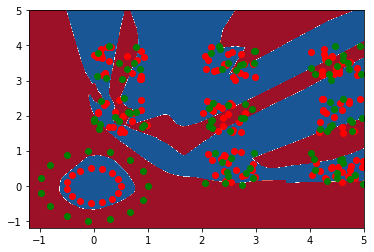

In [28]:
plt.axis([-1.2,5,-1.2,5],'equal')
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdBu')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1] ,c="red")
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1],c= "green" )

In [29]:
X_test.shape

(270, 2)

In [30]:
testset = Grid_data(X_test,Y_test)
testloader = DataLoader(testset,batch_size=10,shuffle=False)

In [31]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (270,    100 * correct / total))

Accuracy of the network on the 270 train images: 58 %


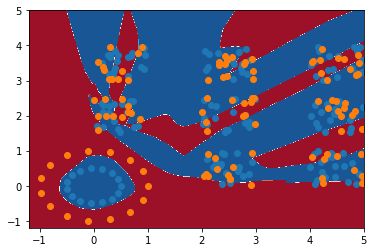

In [32]:
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = "Greys")
plt.axis([-1.2,5,-1.2,5],'equal')
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdBu')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1] )

In [33]:
# X,Y = np.meshgrid(np.arange(-1.1,1.1,0.01),np.arange(-1.1,1.1,0.01))

In [34]:
# X_axis.shape,Y_axis.shape

In [35]:
# plt.contourf(X_axis,Y_axis,np.sign(Z),cmap='RdBu')
